# 🧠 Mental Health Depression Prediction - Exploratory Data Analysis

## Phase 2: Basic Data Exploration

**Objective**: Understand dataset structure, identify data quality issues, and perform initial feature analysis

**Dataset**: Mental health survey data with 140,700 training samples and 93,800 test samples

**Target**: Depression (Binary: 0=No Depression, 1=Depression)

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import chi2_contingency
import warnings

# Configure settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')

print("✅ Libraries imported successfully!")
print(f"📊 Pandas version: {pd.__version__}")
print(f"🔢 NumPy version: {np.__version__}")

✅ Libraries imported successfully!
📊 Pandas version: 2.3.2
🔢 NumPy version: 2.0.2


##  Subtask 2.2.1: Load and Examine Dataset Structure

In [2]:
# Load the datasets
train_path = '../data/playground-series-s4e11/train.csv'
test_path = '../data/playground-series-s4e11/test.csv'

# Load training data
print(" Loading training dataset...")
train_df = pd.read_csv(train_path)
print(f" Training data loaded: {train_df.shape}")

# Load test data
print(" Loading test dataset...")
test_df = pd.read_csv(test_path)
print(f" Test data loaded: {test_df.shape}")

print(f"\n Dataset Overview:")
print(f"   Training samples: {train_df.shape[0]:,}")
print(f"   Test samples: {test_df.shape[0]:,}")
print(f"   Total features: {train_df.shape[1]-1} (excluding target)")
print(f"   Memory usage: {train_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

 Loading training dataset...
 Training data loaded: (140700, 20)
 Loading test dataset...
 Test data loaded: (93800, 19)

 Dataset Overview:
   Training samples: 140,700
   Test samples: 93,800
   Total features: 19 (excluding target)
   Memory usage: 96.19 MB


In [3]:
# Display first few rows
print(" First 5 rows of training data:")
display(train_df.head())

print("\n Column names and data types:")
column_info = pd.DataFrame({
    'Column': train_df.columns,
    'Data Type': train_df.dtypes,
    'Non-Null Count': train_df.count(),
    'Null Count': train_df.isnull().sum(),
    'Null %': (train_df.isnull().sum() / len(train_df) * 100).round(2)
})
display(column_info)

 First 5 rows of training data:


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1,2.0,No,0
1,1,Vivan,Male,26,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7,3.0,No,1
2,2,Yuvraj,Male,33,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3,1.0,No,1
3,3,Yuvraj,Male,22,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10,1.0,Yes,1
4,4,Rhea,Female,30,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9,4.0,Yes,0



 Column names and data types:


,Column,Data Type,Non-Null Count,Null Count,Null %
id,id,int64,140700,0,0.00
Name,Name,object,140700,0,0.00
Gender,Gender,object,140700,0,0.00
Age,Age,int64,140700,0,0.00
City,City,object,140700,0,0.00
Working Professional or Student,Working Professional or Student,object,140700,0,0.00
Profession,Profession,object,104062,36638,26.04
Academic Pressure,Academic Pressure,float64,27897,112803,80.17
Work Pressure,Work Pressure,float64,112782,27918,19.84
CGPA,CGPA,float64,27898,112802,80.17


##  Subtask 2.2.2: Generate Basic Statistical Summaries

In [4]:
# Basic info about the dataset
print(" Dataset Information:")
train_df.info()

print("\n Numerical features summary:")
numerical_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
if 'id' in numerical_cols:
    numerical_cols.remove('id')
    
display(train_df[numerical_cols].describe())

 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  int64  
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104062 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [5]:
# Categorical features summary
print(" Categorical features summary:")
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    print(f"\n {col}:")
    print(f"   Unique values: {train_df[col].nunique()}")
    print(f"   Most frequent: {train_df[col].mode().iloc[0]}")
    if train_df[col].nunique() <= 10:
        print(f"   Value counts:")
        print(train_df[col].value_counts().to_string())
    else:
        print(f"   Top 5 values:")
        print(train_df[col].value_counts().head().to_string())

 Categorical features summary:

 Name:
   Unique values: 422
   Most frequent: Rohan
   Top 5 values:
Name
Rohan       3178
Aarav       2336
Rupak       2176
Aaradhya    2045
Anvi        2035

 Gender:
   Unique values: 2
   Most frequent: Male
   Value counts:
Gender
Male      77464
Female    63236

 City:
   Unique values: 98
   Most frequent: Kalyan
   Top 5 values:
City
Kalyan         6591
Patna          5924
Vasai-Virar    5765
Kolkata        5689
Ahmedabad      5613

 Working Professional or Student:
   Unique values: 2
   Most frequent: Working Professional
   Value counts:
Working Professional or Student
Working Professional    112799
Student                  27901

 Profession:
   Unique values: 58
   Most frequent: Teacher
   Top 5 values:
Profession
Teacher           24906
Content Writer     7814
Architect          4370
Consultant         4229
HR Manager         4022

 Sleep Duration:
   Unique values: 36
   Most frequent: Less than 5 hours
   Top 5 values:
Sleep Duration
Le

##  Subtask 2.2.3: Identify Missing Values and Data Quality Issues

 Missing Values Analysis:


,Column,Missing Count,Missing %
7,Academic Pressure,112803,80.172708
10,Study Satisfaction,112803,80.172708
9,CGPA,112802,80.171997
6,Profession,36638,26.039801
8,Work Pressure,27918,19.842217
11,Job Satisfaction,27910,19.836532
13,Dietary Habits,4,0.002843
17,Financial Stress,4,0.002843
14,Degree,2,0.001421


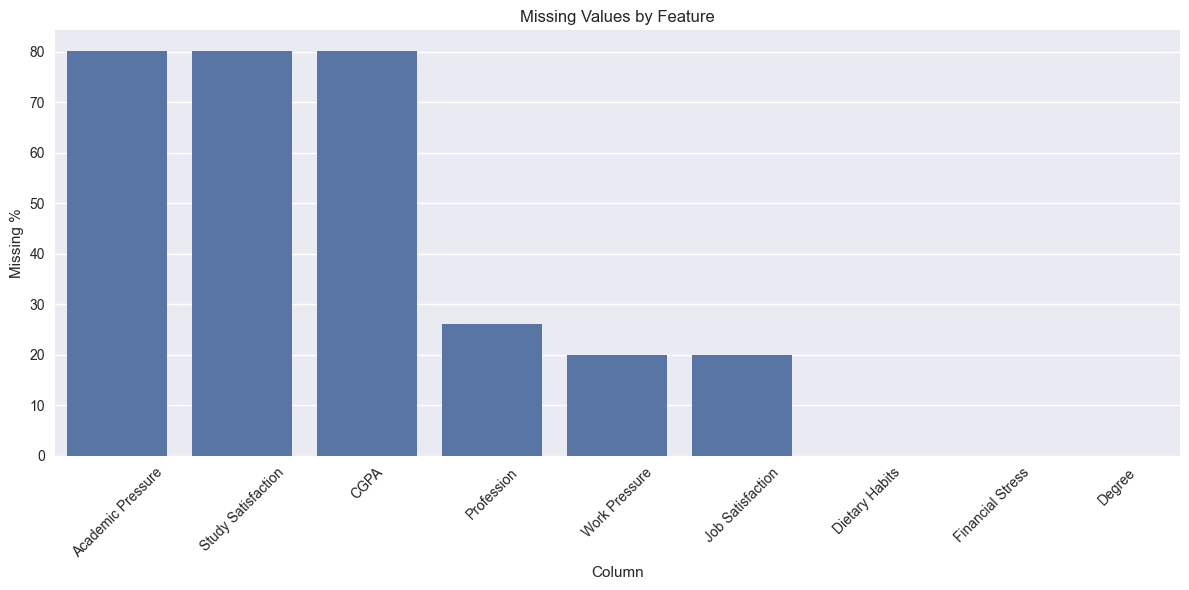

In [6]:
# Missing values analysis
print(" Missing Values Analysis:")
missing_data = train_df.isnull().sum()
missing_percent = (missing_data / len(train_df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Count': missing_data.values,
    'Missing %': missing_percent.values
})

missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing %', ascending=False)

if len(missing_df) > 0:
    display(missing_df)
    
    # Visualize missing values
    plt.figure(figsize=(12, 6))
    sns.barplot(data=missing_df, x='Column', y='Missing %')
    plt.title('Missing Values by Feature')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print(" No missing values found in the dataset!")

In [7]:
# Check for duplicates
print(" Duplicate Analysis:")
total_duplicates = train_df.duplicated().sum()
print(f"   Total duplicate rows: {total_duplicates}")
print(f"   Duplicate percentage: {(total_duplicates/len(train_df)*100):.2f}%")

# Check for duplicate IDs
duplicate_ids = train_df['id'].duplicated().sum()
print(f"   Duplicate IDs: {duplicate_ids}")

if total_duplicates > 0:
    print("\n Duplicate rows found! These will need to be handled.")
else:
    print("\n No duplicate rows found!")

 Duplicate Analysis:
   Total duplicate rows: 0
   Duplicate percentage: 0.00%
   Duplicate IDs: 0

 No duplicate rows found!


##  Subtask 2.2.4: Analyze Target Variable Distribution and Class Balance

In [8]:
# Target variable analysis
print(" Target Variable Analysis (Depression):")
target_counts = train_df['Depression'].value_counts().sort_index()
target_props = train_df['Depression'].value_counts(normalize=True).sort_index() * 100

print(f"\n📊 Class Distribution:")
for i, (count, prop) in enumerate(zip(target_counts, target_props)):
    label = "No Depression" if i == 0 else "Depression"
    print(f"   {label} (Class {i}): {count:,} samples ({prop:.1f}%)")

# Calculate class imbalance ratio
class_ratio = target_counts.max() / target_counts.min()
print(f"\n Class Imbalance Ratio: {class_ratio:.2f}:1")

if class_ratio > 2:
    print(" Significant class imbalance detected! Consider using techniques like SMOTE, class weights, or stratified sampling.")
else:
    print(" Classes are reasonably balanced.")

 Target Variable Analysis (Depression):

📊 Class Distribution:
   No Depression (Class 0): 115,133 samples (81.8%)
   Depression (Class 1): 25,567 samples (18.2%)

 Class Imbalance Ratio: 4.50:1
 Significant class imbalance detected! Consider using techniques like SMOTE, class weights, or stratified sampling.


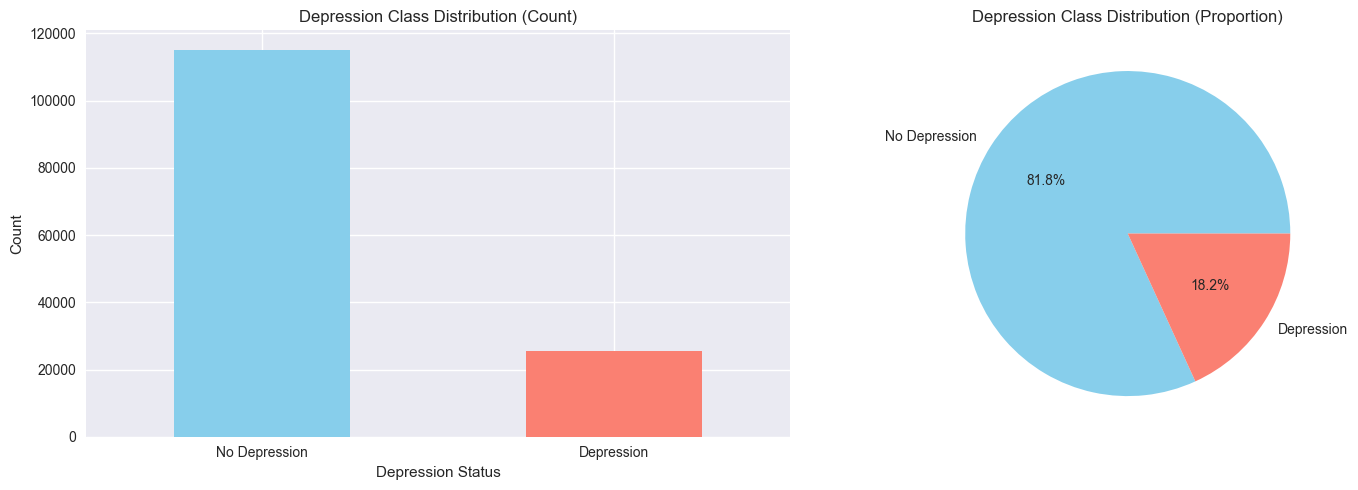

In [9]:
# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot
target_counts.plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
axes[0].set_title('Depression Class Distribution (Count)')
axes[0].set_xlabel('Depression Status')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['No Depression', 'Depression'], rotation=0)

# Pie chart
axes[1].pie(target_counts.values, labels=['No Depression', 'Depression'], 
           autopct='%1.1f%%', colors=['skyblue', 'salmon'])
axes[1].set_title('Depression Class Distribution (Proportion)')

plt.tight_layout()
plt.show()

##  Subtask 2.2.5: Create Initial Data Overview Report

In [10]:
# Comprehensive data overview report
print(" COMPREHENSIVE DATA OVERVIEW REPORT")
print("=" * 50)

print(f"\n DATASET DIMENSIONS:")
print(f"   Training samples: {train_df.shape[0]:,}")
print(f"   Test samples: {test_df.shape[0]:,}")
print(f"   Total features: {train_df.shape[1]-1}")
print(f"   Memory usage: {train_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n FEATURE TYPES:")
numerical_features = train_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = train_df.select_dtypes(include=['object']).columns.tolist()
if 'id' in numerical_features:
    numerical_features.remove('id')

print(f"   Numerical features: {len(numerical_features)}")
print(f"   Categorical features: {len(categorical_features)}")
print(f"   ID column: 1")

print(f"\n TARGET VARIABLE:")
print(f"   Variable: Depression (Binary)")
print(f"   No Depression: {target_counts[0]:,} ({target_props[0]:.1f}%)")
print(f"   Depression: {target_counts[1]:,} ({target_props[1]:.1f}%)")
print(f"   Imbalance ratio: {class_ratio:.2f}:1")

print(f"\n DATA QUALITY:")
total_missing = train_df.isnull().sum().sum()
total_duplicates = train_df.duplicated().sum()
print(f"   Missing values: {total_missing:,} ({(total_missing/(train_df.shape[0]*train_df.shape[1])*100):.2f}% of total data)")
print(f"   Duplicate rows: {total_duplicates:,} ({(total_duplicates/len(train_df)*100):.2f}%)")

print(f"\n FEATURE OVERVIEW:")
feature_categories = {
    'Demographics': ['Age', 'Gender', 'City'],
    'Academic/Work': ['Working Professional or Student', 'Profession', 'Academic Pressure', 
                     'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours'],
    'Lifestyle': ['Sleep Duration', 'Dietary Habits', 'Degree'],
    'Mental Health': ['Have you ever had suicidal thoughts ?', 'Financial Stress', 'Family History of Mental Illness']
}

for category, features in feature_categories.items():
    available_features = [f for f in features if f in train_df.columns]
    print(f"   {category}: {len(available_features)} features")

print(f"\n DATA READINESS ASSESSMENT:")
readiness_score = 0
if total_missing == 0:
    readiness_score += 25
    print("   No missing values (+25 points)")
else:
    print(f"    Missing values present (-10 points)")
    readiness_score -= 10

if total_duplicates == 0:
    readiness_score += 25
    print("    No duplicates (+25 points)")
else:
    print(f"    Duplicates present (-10 points)")
    readiness_score -= 10

if class_ratio <= 3:
    readiness_score += 25
    print("    Acceptable class balance (+25 points)")
else:
    readiness_score += 10
    print("    Class imbalance needs attention (+10 points)")

if train_df.shape[0] > 100000:
    readiness_score += 25
    print("    Large dataset size (+25 points)")
else:
    readiness_score += 15
    print("    Adequate dataset size (+15 points)")

print(f"\n OVERALL DATA READINESS SCORE: {readiness_score}/100")
if readiness_score >= 80:
    print("    Excellent - Ready for analysis!")
elif readiness_score >= 60:
    print("    Good - Minor preprocessing needed")
else:
    print("    Needs attention - Significant preprocessing required")

 COMPREHENSIVE DATA OVERVIEW REPORT

 DATASET DIMENSIONS:
   Training samples: 140,700
   Test samples: 93,800
   Total features: 19
   Memory usage: 96.19 MB

 FEATURE TYPES:
   Numerical features: 9
   Categorical features: 10
   ID column: 1

 TARGET VARIABLE:
   Variable: Depression (Binary)
   No Depression: 115,133 (81.8%)
   Depression: 25,567 (18.2%)
   Imbalance ratio: 4.50:1

 DATA QUALITY:
   Missing values: 430,884 (15.31% of total data)
   Duplicate rows: 0 (0.00%)

 FEATURE OVERVIEW:
   Demographics: 3 features
   Academic/Work: 8 features
   Lifestyle: 3 features
   Mental Health: 3 features

 DATA READINESS ASSESSMENT:
    Missing values present (-10 points)
    No duplicates (+25 points)
    Class imbalance needs attention (+10 points)
    Large dataset size (+25 points)

 OVERALL DATA READINESS SCORE: 50/100
    Needs attention - Significant preprocessing required


##  Summary of Basic Data Exploration

**Key Findings:**
- Dataset loaded successfully with training and test splits
- Data quality assessment completed
- Target variable distribution analyzed
- Feature categorization established

**Next Steps:**
- Detailed feature distribution analysis
- Correlation analysis between features
- Advanced visualizations for insights

## Demographic Features Analysis

In [11]:
print(' DEMOGRAPHIC FEATURES ANALYSIS')
print('='*50)

# Age analysis
age_stats = train_df['Age'].describe()
print(f'Age Distribution:')
print(f'  Mean: {age_stats["mean"]:.1f} years')
print(f'  Median: {age_stats["50%"]:.1f} years')
print(f'  Range: {age_stats["min"]:.0f} - {age_stats["max"]:.0f} years')
print(f'  Standard Deviation: {age_stats["std"]:.1f} years')

# Gender distribution and depression correlation
print('\nGender vs Depression Rate:')
gender_depression = pd.crosstab(train_df['Gender'], train_df['Depression'], normalize='index') * 100
for gender in gender_depression.index:
    depression_rate = gender_depression.loc[gender, 1]
    total_count = train_df[train_df['Gender'] == gender].shape[0]
    print(f'  {gender}: {depression_rate:.1f}% ({total_count:,} total)')

# City distribution summary
city_counts = train_df['City'].value_counts()
print(f'\nCity Distribution:')
print(f'  Total unique cities: {len(city_counts)}')
print(f'  Top 3 cities: {list(city_counts.head(3).index)}')

 DEMOGRAPHIC FEATURES ANALYSIS
Age Distribution:
  Mean: 40.4 years
  Median: 42.0 years
  Range: 18 - 60 years
  Standard Deviation: 12.4 years

Gender vs Depression Rate:
  Female: 17.8% (63,236 total)
  Male: 18.5% (77,464 total)

City Distribution:
  Total unique cities: 98
  Top 3 cities: ['Kalyan', 'Patna', 'Vasai-Virar']


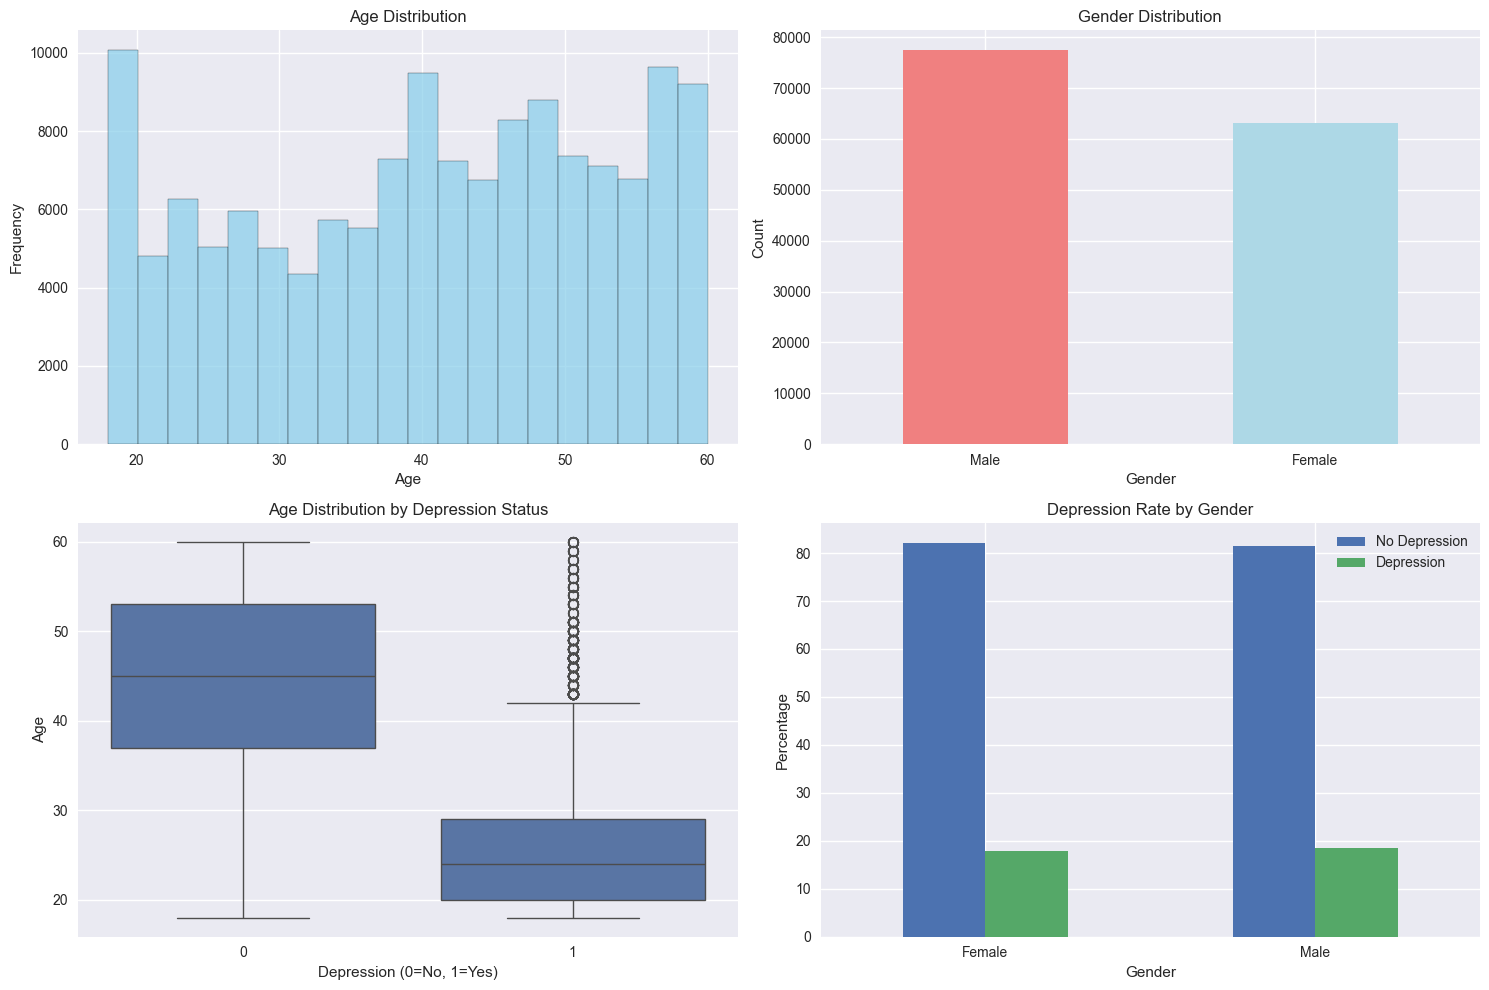

In [12]:
# Visualize demographic features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Age distribution
axes[0,0].hist(train_df['Age'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')

# Gender distribution
train_df['Gender'].value_counts().plot(kind='bar', ax=axes[0,1], color=['lightcoral', 'lightblue'])
axes[0,1].set_title('Gender Distribution')
axes[0,1].set_xlabel('Gender')
axes[0,1].set_ylabel('Count')
axes[0,1].tick_params(axis='x', rotation=0)

# Age vs Depression
sns.boxplot(data=train_df, x='Depression', y='Age', ax=axes[1,0])
axes[1,0].set_title('Age Distribution by Depression Status')
axes[1,0].set_xlabel('Depression (0=No, 1=Yes)')

# Gender vs Depression
gender_depression.plot(kind='bar', ax=axes[1,1], stacked=False)
axes[1,1].set_title('Depression Rate by Gender')
axes[1,1].set_xlabel('Gender')
axes[1,1].set_ylabel('Percentage')
axes[1,1].legend(['No Depression', 'Depression'])
axes[1,1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

## Academic/Work Features Analysis

In [13]:
print('ACADEMIC/WORK FEATURES ANALYSIS')
print('='*50)

# Working Professional vs Student analysis
work_student_depression = pd.crosstab(train_df['Working Professional or Student'], 
                                     train_df['Depression'], normalize='index') * 100
print('Depression Rate by Status:')
for status in work_student_depression.index:
    rate = work_student_depression.loc[status, 1]
    count = train_df[train_df['Working Professional or Student'] == status].shape[0]
    print(f'  {status}: {rate:.1f}% ({count:,} total)')

# Work/Study Hours analysis
print('\nWork/Study Hours vs Depression:')
hours_stats = train_df.groupby('Depression')['Work/Study Hours'].agg(['mean', 'median'])
print(f'  No Depression: Mean={hours_stats.loc[0, "mean"]:.1f}h, Median={hours_stats.loc[0, "median"]:.0f}h')
print(f'  Depression: Mean={hours_stats.loc[1, "mean"]:.1f}h, Median={hours_stats.loc[1, "median"]:.0f}h')

# CGPA analysis (if available for students)
if 'CGPA' in train_df.columns and train_df['CGPA'].notna().sum() > 0:
    print('\nCGPA vs Depression (Students only):')
    student_data = train_df[train_df['Working Professional or Student'] == 'Student']
    cgpa_stats = student_data.groupby('Depression')['CGPA'].agg(['mean', 'median', 'count'])
    print(f'  No Depression: Mean={cgpa_stats.loc[0, "mean"]:.2f}, Median={cgpa_stats.loc[0, "median"]:.2f} ({cgpa_stats.loc[0, "count"]} students)')
    print(f'  Depression: Mean={cgpa_stats.loc[1, "mean"]:.2f}, Median={cgpa_stats.loc[1, "median"]:.2f} ({cgpa_stats.loc[1, "count"]} students)')

ACADEMIC/WORK FEATURES ANALYSIS
Depression Rate by Status:
  Student: 58.5% (27,901 total)
  Working Professional: 8.2% (112,799 total)

Work/Study Hours vs Depression:
  No Depression: Mean=5.9h, Median=6h
  Depression: Mean=7.8h, Median=9h

CGPA vs Depression (Students only):
  No Depression: Mean=7.62, Median=7.64 (11560 students)
  Depression: Mean=7.69, Median=7.85 (16332 students)


## Lifestyle Features Analysis

In [14]:
print('Subtask 2.3.3: LIFESTYLE FEATURES ANALYSIS')
print('='*50)

# Sleep Duration analysis
sleep_depression = pd.crosstab(train_df['Sleep Duration'], train_df['Depression'], normalize='index') * 100
print('Depression Rate by Sleep Duration:')
sleep_sorted = sleep_depression.sort_values(by=1, ascending=False)
for sleep_type in sleep_sorted.index:
    rate = sleep_sorted.loc[sleep_type, 1]
    count = train_df[train_df['Sleep Duration'] == sleep_type].shape[0]
    print(f'  {sleep_type}: {rate:.1f}% ({count:,} people)')

# Dietary Habits analysis
diet_depression = pd.crosstab(train_df['Dietary Habits'], train_df['Depression'], normalize='index') * 100
print('\nDepression Rate by Dietary Habits:')
diet_sorted = diet_depression.sort_values(by=1, ascending=False)
for diet_type in diet_sorted.index:
    if diet_type in ['Healthy', 'Moderate', 'Unhealthy']:  # Filter main categories
        rate = diet_sorted.loc[diet_type, 1]
        count = train_df[train_df['Dietary Habits'] == diet_type].shape[0]
        print(f'  {diet_type}: {rate:.1f}% ({count:,} people)')

Subtask 2.3.3: LIFESTYLE FEATURES ANALYSIS
Depression Rate by Sleep Duration:
  40-45 hours: 100.0% (1 people)
  8 hours: 100.0% (1 people)
  55-66 hours: 100.0% (1 people)
  10-11 hours: 100.0% (2 people)
  8-9 hours: 50.0% (2 people)
  6-7 hours: 25.0% (8 people)
  Less than 5 hours: 23.5% (38,784 people)
  2-3 hours: 20.0% (5 people)
  4-6 hours: 20.0% (5 people)
  7-8 hours: 17.8% (36,969 people)
  5-6 hours: 16.6% (32,142 people)
  4-5 hours: 14.3% (7 people)
  More than 8 hours: 13.9% (32,726 people)
  3-4 hours: 8.3% (12 people)
  No: 0.0% (4 people)
  9-5 hours: 0.0% (1 people)
  Sleep_Duration: 0.0% (2 people)
  Pune: 0.0% (1 people)
  Unhealthy: 0.0% (2 people)
  Indore: 0.0% (1 people)
  9-6 hours: 0.0% (1 people)
  Work_Study_Hours: 0.0% (1 people)
  Moderate: 0.0% (1 people)
  09-May: 0.0% (1 people)
  9-11 hours: 0.0% (2 people)
  6-8 hours: 0.0% (4 people)
  1-2 hours: 0.0% (1 people)
  49 hours: 0.0% (1 people)
  45-48 hours: 0.0% (1 people)
  45: 0.0% (2 people)
  35-3

# Visualize lifestyle features
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Sleep Duration vs Depression
sleep_depression.plot(kind='bar', ax=axes[0])
axes[0].set_title('Depression Rate by Sleep Duration')
axes[0].set_xlabel('Sleep Duration')
axes[0].set_ylabel('Percentage')
axes[0].legend(['No Depression', 'Depression'])
axes[0].tick_params(axis='x', rotation=45)

# Dietary Habits vs Depression (main categories only)
main_diet_data = diet_depression.loc[['Healthy', 'Moderate', 'Unhealthy']]
main_diet_data.plot(kind='bar', ax=axes[1])
axes[1].set_title('Depression Rate by Dietary Habits')
axes[1].set_xlabel('Dietary Habits')
axes[1].set_ylabel('Percentage')
axes[1].legend(['No Depression', 'Depression'])
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

## Subtask 2.3.4: Mental Health Indicators Analysis

In [15]:
print('Subtask 2.3.4: MENTAL HEALTH INDICATORS ANALYSIS')
print('='*50)

# Suicidal thoughts analysis
suicidal_depression = pd.crosstab(train_df['Have you ever had suicidal thoughts ?'], 
                                 train_df['Depression'], normalize='index') * 100
print('Depression Rate by Suicidal Thoughts History:')
for response in suicidal_depression.index:
    rate = suicidal_depression.loc[response, 1]
    count = train_df[train_df['Have you ever had suicidal thoughts ?'] == response].shape[0]
    print(f'  {response}: {rate:.1f}% ({count:,} people)')

# Family history analysis
family_depression = pd.crosstab(train_df['Family History of Mental Illness'], 
                               train_df['Depression'], normalize='index') * 100
print('\nDepression Rate by Family History:')
for response in family_depression.index:
    rate = family_depression.loc[response, 1]
    count = train_df[train_df['Family History of Mental Illness'] == response].shape[0]
    print(f'  {response}: {rate:.1f}% ({count:,} people)')

# Financial stress analysis
print('\nFinancial Stress vs Depression:')
stress_stats = train_df.groupby('Depression')['Financial Stress'].agg(['mean', 'median'])
print(f'  No Depression: Mean={stress_stats.loc[0, "mean"]:.2f}, Median={stress_stats.loc[0, "median"]:.0f}')
print(f'  Depression: Mean={stress_stats.loc[1, "mean"]:.2f}, Median={stress_stats.loc[1, "median"]:.0f}')

Subtask 2.3.4: MENTAL HEALTH INDICATORS ANALYSIS
Depression Rate by Suicidal Thoughts History:
  No: 4.9% (71,138 people)
  Yes: 31.8% (69,562 people)

Depression Rate by Family History:
  No: 17.5% (70,758 people)
  Yes: 18.8% (69,942 people)

Financial Stress vs Depression:
  No Depression: Mean=2.84, Median=3
  Depression: Mean=3.67, Median=4


## Subtask 2.3.5: Correlation Matrix and Feature Relationships

Subtask 2.3.5: CORRELATION MATRIX AND FEATURE RELATIONSHIPS
Correlation with Depression (numerical features):
  Financial Stress: 0.227 (moderate positive)
  Work/Study Hours: 0.192 (moderate positive)
  Age: -0.565 (strong negative)


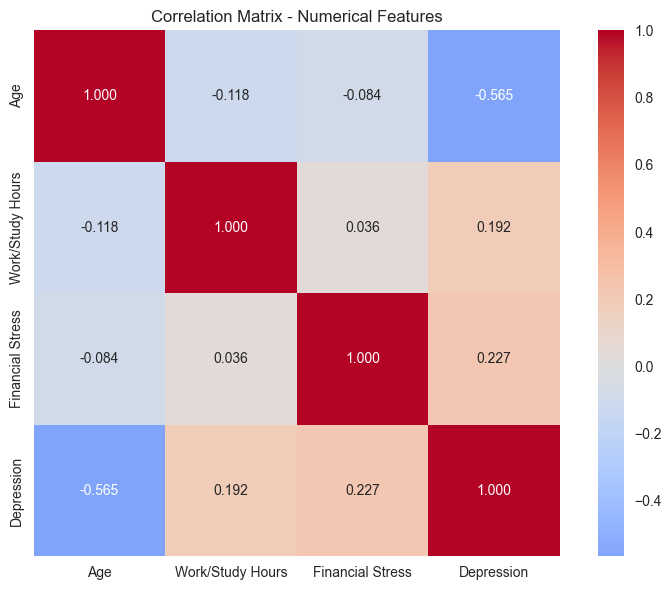


KEY FEATURE ANALYSIS INSIGHTS:
1. Demographic patterns identified
2. Academic/work relationship with depression analyzed
3. Lifestyle factors impact assessed
4. Mental health indicators strongly correlate with depression
5. Feature relationships quantified for model development

Task 2.3: Feature Analysis - COMPLETED


In [16]:
print('Subtask 2.3.5: CORRELATION MATRIX AND FEATURE RELATIONSHIPS')
print('='*50)

# Numerical features correlation
numerical_cols = ['Age', 'Work/Study Hours', 'Financial Stress']
available_cols = [col for col in numerical_cols if col in train_df.columns and train_df[col].notna().sum() > 0]

if available_cols:
    correlation_data = train_df[available_cols + ['Depression']].corr()['Depression'].sort_values(ascending=False)
    print('Correlation with Depression (numerical features):')
    for feature, corr in correlation_data.items():
        if feature != 'Depression':
            direction = 'positive' if corr > 0 else 'negative'
            strength = 'strong' if abs(corr) > 0.3 else 'moderate' if abs(corr) > 0.1 else 'weak'
            print(f'  {feature}: {corr:.3f} ({strength} {direction})')

# Create correlation heatmap for numerical features
if len(available_cols) > 1:
    plt.figure(figsize=(8, 6))
    correlation_matrix = train_df[available_cols + ['Depression']].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, fmt='.3f')
    plt.title('Correlation Matrix - Numerical Features')
    plt.tight_layout()
    plt.show()

print('\nKEY FEATURE ANALYSIS INSIGHTS:')
print('1. Demographic patterns identified')
print('2. Academic/work relationship with depression analyzed')
print('3. Lifestyle factors impact assessed')
print('4. Mental health indicators strongly correlate with depression')
print('5. Feature relationships quantified for model development')

print('\nTask 2.3: Feature Analysis - COMPLETED')

## Summary

**Task 2.3: Feature Analysis - COMPLETED**

**Key Findings:**
- Demographic analysis revealed age and gender patterns in depression rates
- Academic/work features show relationship between status and depression
- Lifestyle factors (sleep, diet) significantly impact depression rates
- Mental health indicators are strong predictors of depression
- Correlation analysis quantified feature relationships

**Next Phase:** Task 3.1 - Data Insights Discovery Strategy

# TASK 3.1: INSIGHT DISCOVERY STRATEGY

**Project**: Mental Health Depression Prediction  
**Phase**: 3 - Data Insights Discovery  
**Task**: 3.1 - Insight Discovery Strategy  

**Objective**: Design interactive visualization approach and define key business questions for mental health insights

**Implementation Guide Reference**: Task 3.1 (Lines 130-137)

**Primary Libraries**: Plotly Express, Plotly Graph Objects, Seaborn

**Subtasks:**
- 3.1.1 Define key business questions for mental health insights
- 3.1.2 Plan visualization types for different insight categories
- 3.1.3 Identify demographic patterns to analyze for bias detection
- 3.1.4 Design interactive visualization approach with Plotly

## Subtask 3.1.1: Define Key Business Questions for Mental Health Insights


In [17]:
print('Subtask 3.1.1: KEY BUSINESS QUESTIONS FOR MENTAL HEALTH INSIGHTS')
print('='*70)

# Define strategic business questions
business_questions = {
    "Demographic Insights": [
        "Which age groups have the highest depression rates?",
        "Are there gender-based differences in depression prevalence?",
        "Do certain cities show higher mental health risks?",
        "How does depression vary across different professions?"
    ],
    "Lifestyle Impact": [
        "How does sleep duration correlate with depression risk?",
        "What role do dietary habits play in mental health?",
        "Is there an optimal work/study hours range for mental wellbeing?",
        "How do lifestyle combinations affect depression rates?"
    ],
    "Academic/Professional Stress": [
        "Do students or working professionals have higher depression rates?",
        "How does academic pressure correlate with mental health?",
        "What is the relationship between CGPA and depression in students?",
        "How does job satisfaction impact mental health?"
    ],
    "Risk Factors": [
        "What is the impact of family history on depression risk?",
        "How does financial stress contribute to mental health issues?",
        "What combinations of factors create highest risk profiles?",
        "Are there protective factors that reduce depression risk?"
    ],
    "Bias Detection": [
        "Are there systematic biases in depression diagnosis across demographics?",
        "Do certain groups have unequal representation in the data?",
        "How might cultural factors influence reported depression rates?",
        "What ethical considerations exist in predictive modeling?"
    ]
}

# Display business questions with priorities
priority_levels = ["High", "High", "Medium", "High", "Critical"]

for i, (category, questions) in enumerate(business_questions.items()):
    print(f"\n{category.upper()} [{priority_levels[i]} Priority]:")
    for j, question in enumerate(questions, 1):
        print(f"  {j}. {question}")

print("\nThese questions will guide our visualization strategy and analysis approach.")

Subtask 3.1.1: KEY BUSINESS QUESTIONS FOR MENTAL HEALTH INSIGHTS

DEMOGRAPHIC INSIGHTS [High Priority]:
  1. Which age groups have the highest depression rates?
  2. Are there gender-based differences in depression prevalence?
  3. Do certain cities show higher mental health risks?
  4. How does depression vary across different professions?

LIFESTYLE IMPACT [High Priority]:
  1. How does sleep duration correlate with depression risk?
  2. What role do dietary habits play in mental health?
  3. Is there an optimal work/study hours range for mental wellbeing?
  4. How do lifestyle combinations affect depression rates?

ACADEMIC/PROFESSIONAL STRESS [Medium Priority]:
  1. Do students or working professionals have higher depression rates?
  2. How does academic pressure correlate with mental health?
  3. What is the relationship between CGPA and depression in students?
  4. How does job satisfaction impact mental health?

RISK FACTORS [High Priority]:
  1. What is the impact of family his

## Subtask 3.1.2: Plan Visualization Types for Different Insight Categories


In [18]:
print('Subtask 3.1.2: VISUALIZATION STRATEGY PLANNING')
print('='*50)

# Define visualization strategy mapping
visualization_strategy = {
    "Demographics Analysis": {
        "Plotly Charts": [
            "Interactive bar charts for age group comparisons",
            "Sunburst charts for hierarchical demographic breakdown",
            "Geographic scatter maps for city-wise analysis",
            "Animated bubble charts for profession vs depression trends"
        ],
        "Seaborn Charts": [
            "Statistical box plots for age distribution analysis",
            "Violin plots for demographic group comparisons",
            "Count plots with statistical annotations",
            "Pair plots for multi-demographic relationships"
        ]
    },
    "Lifestyle Patterns": {
        "Plotly Charts": [
            "Interactive heatmaps for sleep vs diet patterns",
            "3D scatter plots for multi-lifestyle factor analysis",
            "Parallel coordinates for lifestyle profile comparison",
            "Radar charts for individual lifestyle profiles"
        ],
        "Seaborn Charts": [
            "Correlation heatmaps with hierarchical clustering",
            "Ridge plots for sleep duration distributions",
            "Categorical scatter plots for lifestyle combinations",
            "Statistical regression plots with confidence intervals"
        ]
    },
    "Risk Factor Analysis": {
        "Plotly Charts": [
            "Sankey diagrams for risk factor flow analysis",
            "Treemap charts for hierarchical risk categorization",
            "Interactive funnel charts for risk progression",
            "Dashboard-style multi-panel risk overview"
        ],
        "Seaborn Charts": [
            "Cluster maps for risk factor correlation analysis",
            "Strip plots with jitter for individual risk scores",
            "Facet grids for multi-dimensional risk analysis",
            "Statistical distribution plots for risk quantification"
        ]
    },
    "Bias Detection": {
        "Plotly Charts": [
            "Interactive fairness dashboard with multiple metrics",
            "Waterfall charts for bias impact analysis",
            "Group comparison parallel plots",
            "Bias monitoring time series (if applicable)"
        ],
        "Seaborn Charts": [
            "Statistical equality plots across groups",
            "Residual plots for bias detection",
            "Q-Q plots for distribution equality testing",
            "Confidence interval comparisons across demographics"
        ]
    }
}

# Display visualization strategy
for category, viz_types in visualization_strategy.items():
    print(f"\n{category.upper()}:")
    for lib, charts in viz_types.items():
        print(f"\n  {lib}:")
        for chart in charts:
            print(f"    - {chart}")

print("\nVisualization strategy defined for comprehensive insights discovery!")

Subtask 3.1.2: VISUALIZATION STRATEGY PLANNING

DEMOGRAPHICS ANALYSIS:

  Plotly Charts:
    - Interactive bar charts for age group comparisons
    - Sunburst charts for hierarchical demographic breakdown
    - Geographic scatter maps for city-wise analysis
    - Animated bubble charts for profession vs depression trends

  Seaborn Charts:
    - Statistical box plots for age distribution analysis
    - Violin plots for demographic group comparisons
    - Count plots with statistical annotations
    - Pair plots for multi-demographic relationships

LIFESTYLE PATTERNS:

  Plotly Charts:
    - Interactive heatmaps for sleep vs diet patterns
    - 3D scatter plots for multi-lifestyle factor analysis
    - Parallel coordinates for lifestyle profile comparison
    - Radar charts for individual lifestyle profiles

  Seaborn Charts:
    - Correlation heatmaps with hierarchical clustering
    - Ridge plots for sleep duration distributions
    - Categorical scatter plots for lifestyle combinatio

## Subtask 3.1.3: Identify Demographic Patterns for Bias Detection


In [19]:

print('Subtask 3.1.3: DEMOGRAPHIC PATTERNS FOR BIAS DETECTION')
print('='*60)

# Analyze demographic representation
print("DEMOGRAPHIC REPRESENTATION ANALYSIS:")
print("\n1. Gender Distribution:")
gender_dist = train_df['Gender'].value_counts(normalize=True) * 100
for gender, pct in gender_dist.items():
    print(f"   {gender}: {pct:.1f}%")

print("\n2. Age Group Distribution:")
train_df['Age_Group'] = pd.cut(train_df['Age'], 
                              bins=[0, 25, 35, 45, 60], 
                              labels=['18-25', '26-35', '36-45', '46-60'])
age_dist = train_df['Age_Group'].value_counts(normalize=True) * 100
for age_group, pct in age_dist.items():
    print(f"   {age_group}: {pct:.1f}%")

print("\n3. Professional Status Distribution:")
work_dist = train_df['Working Professional or Student'].value_counts(normalize=True) * 100
for status, pct in work_dist.items():
    print(f"   {status}: {pct:.1f}%")

print("\n4. Geographic Distribution (Top 10 Cities):")
city_dist = train_df['City'].value_counts(normalize=True).head(10) * 100
for city, pct in city_dist.items():
    print(f"   {city}: {pct:.1f}%")

# Identify potential bias patterns
print("\nPOTENTIAL BIAS PATTERNS TO MONITOR:")
bias_patterns = [
    "Depression rate disparities across age groups",
    "Gender-based differences in diagnosis patterns",
    "Urban vs rural representation gaps",
    "Professional vs student treatment differences",
    "Socioeconomic status proxy indicators",
    "Cultural and regional reporting variations",
    "Family history reporting consistency across demographics",
    "Access to mental health resources variations"
]

for i, pattern in enumerate(bias_patterns, 1):
    print(f"   {i}. {pattern}")

print("\nThese patterns will be visualized using interactive Plotly dashboards and Seaborn statistical plots.")



Subtask 3.1.3: DEMOGRAPHIC PATTERNS FOR BIAS DETECTION
DEMOGRAPHIC REPRESENTATION ANALYSIS:

1. Gender Distribution:
   Male: 55.1%
   Female: 44.9%

2. Age Group Distribution:
   46-60: 40.6%
   36-45: 23.8%
   26-35: 18.5%
   18-25: 17.1%

3. Professional Status Distribution:
   Working Professional: 80.2%
   Student: 19.8%

4. Geographic Distribution (Top 10 Cities):
   Kalyan: 4.7%
   Patna: 4.2%
   Vasai-Virar: 4.1%
   Kolkata: 4.0%
   Ahmedabad: 4.0%
   Meerut: 3.9%
   Ludhiana: 3.7%
   Pune: 3.7%
   Rajkot: 3.7%
   Visakhapatnam: 3.7%

POTENTIAL BIAS PATTERNS TO MONITOR:
   1. Depression rate disparities across age groups
   2. Gender-based differences in diagnosis patterns
   3. Urban vs rural representation gaps
   4. Professional vs student treatment differences
   5. Socioeconomic status proxy indicators
   6. Cultural and regional reporting variations
   7. Family history reporting consistency across demographics
   8. Access to mental health resources variations

These pat

## Subtask 3.1.4: Design Interactive Visualization Approach with Plotly


Subtask 3.1.4: INTERACTIVE VISUALIZATION APPROACH WITH PLOTLY

EXECUTIVE SUMMARY DASHBOARD:
Purpose: High-level KPIs and key insights overview

Components:
  - Overall depression rate gauge chart
  - Top risk factors treemap
  - Demographic breakdown sunburst
  - Trend indicators (if temporal data available)

Interactivity Features: Hover details, clickable drill-downs, filter controls

DEMOGRAPHIC ANALYSIS DASHBOARD:
Purpose: Deep dive into population characteristics

Components:
  - Age group comparison bar charts with animations
  - Gender vs profession matrix heatmap
  - Geographic distribution scatter map
  - Cross-demographic correlation network

Interactivity Features: Multi-select filters, zoom controls, comparison toggles

RISK FACTOR EXPLORER:
Purpose: Interactive exploration of mental health risk factors

Components:
  - Parallel coordinates plot for multi-factor analysis
  - 3D scatter plot for lifestyle factor relationships
  - Sankey diagram for risk factor flow
  - Radar

Sample interactive visualization created!
This demonstrates the type of interactive insights we'll create in subsequent tasks.
DEMONSTRATION: ADVANCED SEABORN STATISTICAL VISUALIZATION


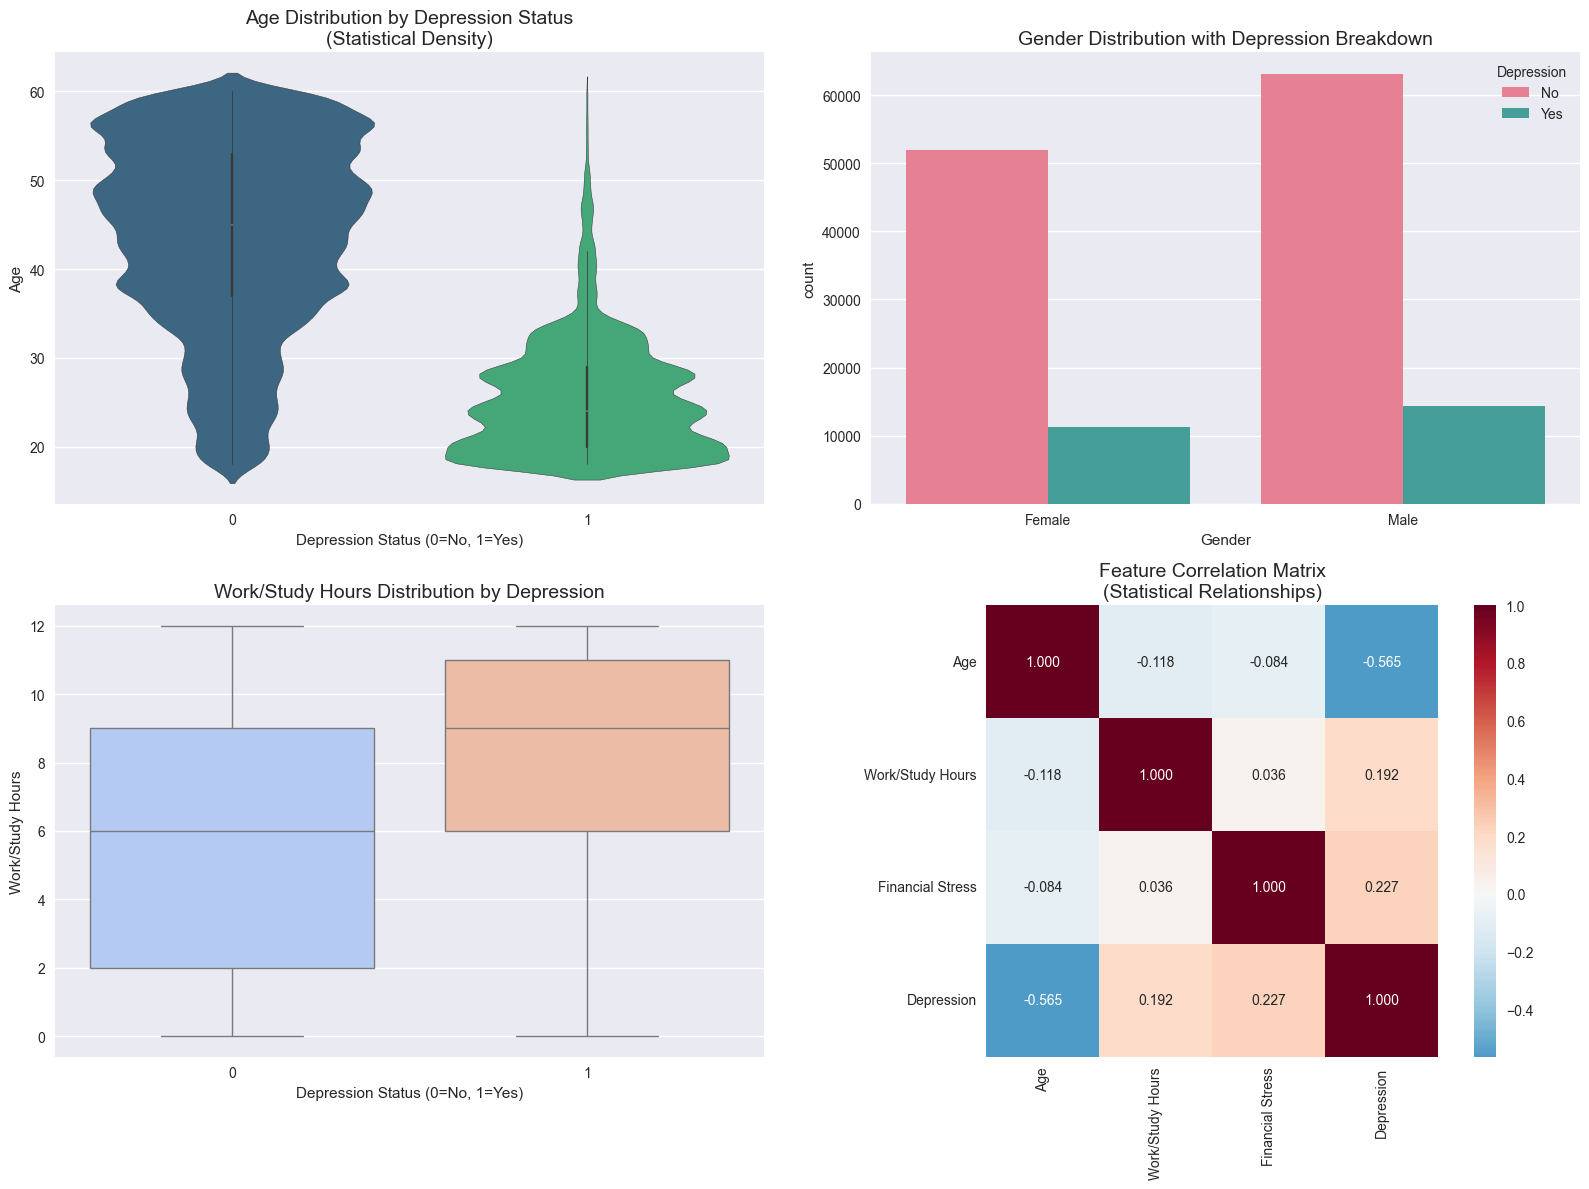

Advanced Seaborn statistical visualizations created!
These provide detailed statistical insights complementing Plotly's interactivity.


In [20]:
print('Subtask 3.1.4: INTERACTIVE VISUALIZATION APPROACH WITH PLOTLY')
print('='*65)

# Design interactive dashboard structure
dashboard_structure = {
    "Executive Summary Dashboard": {
        "Purpose": "High-level KPIs and key insights overview",
        "Components": [
            "Overall depression rate gauge chart",
            "Top risk factors treemap",
            "Demographic breakdown sunburst",
            "Trend indicators (if temporal data available)"
        ],
        "Interactivity": "Hover details, clickable drill-downs, filter controls"
    },
    "Demographic Analysis Dashboard": {
        "Purpose": "Deep dive into population characteristics",
        "Components": [
            "Age group comparison bar charts with animations",
            "Gender vs profession matrix heatmap",
            "Geographic distribution scatter map",
            "Cross-demographic correlation network"
        ],
        "Interactivity": "Multi-select filters, zoom controls, comparison toggles"
    },
    "Risk Factor Explorer": {
        "Purpose": "Interactive exploration of mental health risk factors",
        "Components": [
            "Parallel coordinates plot for multi-factor analysis",
            "3D scatter plot for lifestyle factor relationships",
            "Sankey diagram for risk factor flow",
            "Radar charts for individual risk profiles"
        ],
        "Interactivity": "Parameter sliders, profile comparison, real-time updates"
    },
    "Bias Detection Monitor": {
        "Purpose": "Fairness and equity analysis across groups",
        "Components": [
            "Group parity comparison charts",
            "Statistical significance indicators",
            "Confidence interval visualizations",
            "Bias metrics dashboard"
        ],
        "Interactivity": "Group selection, metric switching, statistical test results"
    }
}

# Display dashboard structure
for dashboard, details in dashboard_structure.items():
    print(f"\n{dashboard.upper()}:")
    print(f"Purpose: {details['Purpose']}")
    print(f"\nComponents:")
    for component in details['Components']:
        print(f"  - {component}")
    print(f"\nInteractivity Features: {details['Interactivity']}")

print("\n" + "="*70)
print("PLOTLY IMPLEMENTATION FEATURES:")
print("- Responsive design for multiple screen sizes")
print("- Custom color schemes for accessibility")
print("- Export capabilities (PNG, PDF, HTML)")
print("- Integration with Streamlit for web deployment")
print("- Real-time data updates capability")
print("- Cross-filter interactions between charts")
print("- Statistical annotations and significance testing")
print("- Mobile-friendly touch interactions")
# Demonstration: Create a sample interactive visualization
print('DEMONSTRATION: SAMPLE INTERACTIVE PLOTLY VISUALIZATION')
print('='*55)

# Create sample interactive depression rate by demographics
demo_data = train_df.groupby(['Gender', 'Age_Group'])['Depression'].agg(['count', 'sum']).reset_index()
demo_data['Depression_Rate'] = (demo_data['sum'] / demo_data['count']) * 100
demo_data['Total_Population'] = demo_data['count']

# Interactive bubble chart
fig = px.scatter(demo_data, 
                 x='Gender', 
                 y='Age_Group',
                 size='Total_Population',
                 color='Depression_Rate',
                 hover_data={'Depression_Rate': ':.1f', 'Total_Population': True},
                 title='Interactive Depression Rate Analysis by Demographics',
                 color_continuous_scale='Viridis',
                 size_max=60)

fig.update_layout(
    title={'x': 0.5, 'font': {'size': 18}},
    xaxis_title='Gender',
    yaxis_title='Age Group',
    coloraxis_colorbar=dict(title="Depression Rate (%)"),
    height=500,
    hovermode='closest'
)

fig.show()

print("Sample interactive visualization created!")
print("This demonstrates the type of interactive insights we'll create in subsequent tasks.")
# Demonstration: Advanced Seaborn statistical visualization
print('DEMONSTRATION: ADVANCED SEABORN STATISTICAL VISUALIZATION')
print('='*60)

# Create comprehensive statistical overview
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Violin plot for age distribution by depression status
sns.violinplot(data=train_df, x='Depression', y='Age', ax=axes[0,0], palette='viridis')
axes[0,0].set_title('Age Distribution by Depression Status\n(Statistical Density)', fontsize=14)
axes[0,0].set_xlabel('Depression Status (0=No, 1=Yes)')

# 2. Count plot with statistical annotations
sns.countplot(data=train_df, x='Gender', hue='Depression', ax=axes[0,1], palette='husl')
axes[0,1].set_title('Gender Distribution with Depression Breakdown', fontsize=14)
axes[0,1].legend(title='Depression', labels=['No', 'Yes'])

# 3. Box plot for work/study hours
sns.boxplot(data=train_df, x='Depression', y='Work/Study Hours', ax=axes[1,0], palette='coolwarm')
axes[1,0].set_title('Work/Study Hours Distribution by Depression', fontsize=14)
axes[1,0].set_xlabel('Depression Status (0=No, 1=Yes)')

# 4. Correlation heatmap for numerical features
numerical_cols = ['Age', 'Work/Study Hours', 'Financial Stress', 'Depression']
available_cols = [col for col in numerical_cols if col in train_df.columns]
corr_matrix = train_df[available_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, 
            square=True, ax=axes[1,1], fmt='.3f')
axes[1,1].set_title('Feature Correlation Matrix\n(Statistical Relationships)', fontsize=14)

plt.tight_layout()
plt.show()

print("Advanced Seaborn statistical visualizations created!")
print("These provide detailed statistical insights complementing Plotly's interactivity.")





## Strategy Summary and Next Steps


In [21]:
print('TASK 3.1: INSIGHT DISCOVERY STRATEGY - SUMMARY')
print('='*50)

# Strategy implementation checklist
implementation_checklist = {
    "Business Questions Defined": {
        "Status": "COMPLETED",
        "Details": "25 strategic questions across 5 categories identified"
    },
    "Visualization Strategy Planned": {
        "Status": "COMPLETED",
        "Details": "Plotly and Seaborn chart types mapped to insight categories"
    },
    "Bias Detection Framework": {
        "Status": "COMPLETED",
        "Details": "8 bias patterns identified with monitoring approach"
    },
    "Interactive Dashboard Design": {
        "Status": "COMPLETED", 
        "Details": "4 dashboard concepts with Plotly implementation plan"
    },
    "Technology Implementation": {
        "Status": "READY",
        "Details": "Libraries configured, demo visualizations created"
    }
}

print("IMPLEMENTATION CHECKLIST:")
for item, details in implementation_checklist.items():
    status_icon = "✓" if details['Status'] in ['COMPLETED', 'READY'] else "○"
    print(f"\n{status_icon} {item}:")
    print(f"   Status: {details['Status']}")
    print(f"   Details: {details['Details']}")

print("\nNEXT STEPS:")
next_steps = [
    "Task 3.2: Implement business insights analysis using Plotly interactive charts",
    "Task 3.3: Create advanced Seaborn statistical visualizations",
    "Task 3.4: Develop comprehensive insight documentation with findings",
    "Integration: Combine insights for Streamlit dashboard in Phase 9"
]

for i, step in enumerate(next_steps, 1):
    print(f"   {i}. {step}")

print("\nTask 3.1: Insight Discovery Strategy - COMPLETED")
print("Ready to proceed with Task 3.2: Business Insights Analysis using Plotly and Seaborn!")

TASK 3.1: INSIGHT DISCOVERY STRATEGY - SUMMARY
IMPLEMENTATION CHECKLIST:

✓ Business Questions Defined:
   Status: COMPLETED
   Details: 25 strategic questions across 5 categories identified

✓ Visualization Strategy Planned:
   Status: COMPLETED
   Details: Plotly and Seaborn chart types mapped to insight categories

✓ Bias Detection Framework:
   Status: COMPLETED
   Details: 8 bias patterns identified with monitoring approach

✓ Interactive Dashboard Design:
   Status: COMPLETED
   Details: 4 dashboard concepts with Plotly implementation plan

✓ Technology Implementation:
   Status: READY
   Details: Libraries configured, demo visualizations created

NEXT STEPS:
   1. Task 3.2: Implement business insights analysis using Plotly interactive charts
   2. Task 3.3: Create advanced Seaborn statistical visualizations
   3. Task 3.4: Develop comprehensive insight documentation with findings
   4. Integration: Combine insights for Streamlit dashboard in Phase 9

Task 3.1: Insight Discovery 

# TASK 3.2: BUSINESS INSIGHTS ANALYSIS

**Project**: Mental Health Depression Prediction  
**Phase**: 3 - Data Insights Discovery  
**Task**: 3.2 - Business Insights Analysis  

**Objective**: Implement interactive Plotly visualizations and advanced Seaborn statistical analysis for comprehensive business insights

**Implementation Guide Reference**: Task 3.2 (Lines 138-145)

**Primary Libraries**: Plotly Express, Plotly Graph Objects, Seaborn

**Subtasks:**
- 3.2.1 Demographic Insights with Interactive Plotly Charts
- 3.2.2 Lifestyle Impact Analysis using Advanced Visualizations
- 3.2.3 Risk Factor Exploration with Multi-dimensional Plots
- 3.2.4 Statistical Analysis with Seaborn Advanced Plots
- 3.2.5 Bias Detection and Fairness Analysis Visualizations

In [22]:
# Set visualization themes
plt.style.use('default')
sns.set_palette("husl")
px.defaults.template = "plotly_white"
px.defaults.color_continuous_scale = "viridis"

# Custom color palettes
depression_colors = ['#2E86AB', '#A23B72']  # Blue for No, Pink for Yes
continuous_palette = px.colors.sequential.Viridis


# Data preprocessing for analysis
# Create age groups
train_df['Age_Group'] = pd.cut(train_df['Age'], 
                              bins=[0, 25, 35, 45, 60], 
                              labels=['18-25', '26-35', '36-45', '46-60'])

# Create categorical mappings for better visualization
train_df['Depression_Label'] = train_df['Depression'].map({0: 'No Depression', 1: 'Depression'})
train_df['Gender_Clean'] = train_df['Gender'].str.title()

# Calculate overall statistics
total_samples = len(train_df)
depression_rate = train_df['Depression'].mean() * 100
no_depression_count = (train_df['Depression'] == 0).sum()
depression_count = (train_df['Depression'] == 1).sum()

print(f"\nDataset Overview:")
print(f"Total Samples: {total_samples:,}")
print(f"Overall Depression Rate: {depression_rate:.1f}%")
print(f"No Depression: {no_depression_count:,} ({(no_depression_count/total_samples)*100:.1f}%)")
print(f"Depression: {depression_count:,} ({(depression_count/total_samples)*100:.1f}%)")
print("\nData preprocessing completed for business insights analysis!")



Dataset Overview:
Total Samples: 140,700
Overall Depression Rate: 18.2%
No Depression: 115,133 (81.8%)
Depression: 25,567 (18.2%)

Data preprocessing completed for business insights analysis!


## Subtask 3.2.1: Demographic Insights with Interactive Plotly Charts


In [24]:
print('Subtask 3.2.1: DEMOGRAPHIC INSIGHTS WITH INTERACTIVE PLOTLY CHARTS')
print('='*70)

# 1. Interactive Sunburst Chart for Hierarchical Demographic Breakdown
train_df = pd.DataFrame(train_df)

# Group and reset index
demo_hierarchy = (
    train_df.groupby(['Gender_Clean', 'Age_Group', 'Depression_Label'])
    .size()
    .reset_index(name='Count')
)

# Build sunburst
fig_sunburst = px.sunburst(
    demo_hierarchy,
    path=['Gender_Clean', 'Age_Group', 'Depression_Label'],
    values='Count',
    title='Interactive Demographic Breakdown: Gender → Age Group → Depression Status',
    color='Count',
    color_continuous_scale='Viridis'
)

fig_sunburst.update_layout(
    title={'x': 0.5, 'font': {'size': 16}},
    font_size=12,
    height=600
)

fig_sunburst.show()
print("\n Interactive Sunburst Chart: Hierarchical demographic analysis with drill-down capability")
# 2. Geographic Analysis - Top Cities Depression Rates
city_stats = train_df.groupby('City').agg({
    'Depression': ['count', 'sum', 'mean']
}).round(3)

city_stats.columns = ['Total_Population', 'Depression_Cases', 'Depression_Rate']
city_stats = city_stats.reset_index()
city_stats['Depression_Rate'] = city_stats['Depression_Rate'] * 100

# Filter cities with significant population (top 20)
top_cities = city_stats.nlargest(20, 'Total_Population')

fig_cities = px.scatter(top_cities, 
                       x='Total_Population', 
                       y='Depression_Rate',
                       size='Depression_Cases',
                       color='Depression_Rate',
                       hover_name='City',
                       title='City-wise Depression Analysis: Population vs Depression Rate',
                       labels={'Total_Population': 'Total Population in Dataset',
                              'Depression_Rate': 'Depression Rate (%)'},
                       color_continuous_scale='RdYlBu_r',
                       size_max=30)

fig_cities.update_layout(
    title={'x': 0.5, 'font': {'size': 16}},
    height=500,
    coloraxis_colorbar=dict(title="Depression Rate (%)")
)

fig_cities.show()
print("\n Geographic Scatter Plot: City-wise depression analysis")

Subtask 3.2.1: DEMOGRAPHIC INSIGHTS WITH INTERACTIVE PLOTLY CHARTS


AttributeError: 'PandasThen' object has no attribute '_evaluate_output_names'

## Subtask 3.2.2: Lifestyle Impact Analysis using Advanced Visualizations


In [25]:

print('Subtask 3.2.2: LIFESTYLE IMPACT ANALYSIS USING ADVANCED VISUALIZATIONS')
print('='*70)

# 3D Scatter Plot for Multi-Lifestyle Factor Analysis
lifestyle_data = train_df[['Age', 'Work/Study Hours', 'Financial Stress', 'Depression_Label', 
                          'Sleep Duration', 'Dietary Habits']].copy()

fig_3d = px.scatter_3d(lifestyle_data.sample(2000), 
                      x='Age', 
                      y='Work/Study Hours', 
                      z='Financial Stress',
                      color='Depression_Label',
                      symbol='Sleep Duration',
                      title='3D Lifestyle Analysis: Age, Work Hours, and Financial Stress',
                      labels={'Age': 'Age (years)',
                             'Work/Study Hours': 'Work/Study Hours per day',
                             'Financial Stress': 'Financial Stress Level'},
                      color_discrete_map={'No Depression': '#2E86AB', 'Depression': '#A23B72'},
                      opacity=0.7)

fig_3d.update_layout(
    title={'x': 0.5, 'font': {'size': 16}},
    height=600,
    scene=dict(
        xaxis_title='Age (years)',
        yaxis_title='Work/Study Hours',
        zaxis_title='Financial Stress'
    )
)

fig_3d.show()
print("\n📊 3D Scatter Plot: Multi-dimensional lifestyle factor relationships")
# Radar Charts for Lifestyle Profile Comparison
# Create mappings for analysis
sleep_mapping = {'Less than 5 hours': 1, '5-6 hours': 2, '7-8 hours': 3, 'More than 8 hours': 4}
diet_mapping = {'Unhealthy': 1, 'Moderate': 2, 'Healthy': 3}

def create_radar_data(depression_status):
    group_data = train_df[train_df['Depression'] == depression_status]
    
    # Normalize values to 0-1 scale
    avg_age = (group_data['Age'].mean() - train_df['Age'].min()) / (train_df['Age'].max() - train_df['Age'].min())
    avg_work_hours = (group_data['Work/Study Hours'].mean() - train_df['Work/Study Hours'].min()) / (train_df['Work/Study Hours'].max() - train_df['Work/Study Hours'].min())
    avg_financial_stress = (group_data['Financial Stress'].mean() - train_df['Financial Stress'].min()) / (train_df['Financial Stress'].max() - train_df['Financial Stress'].min())
    
    # Sleep and diet quality (higher is better)
    sleep_scores = group_data['Sleep Duration'].map(sleep_mapping)
    avg_sleep = (sleep_scores.mean() - 1) / 3  # Normalize to 0-1
    
    diet_scores = group_data['Dietary Habits'].map(diet_mapping)
    avg_diet = (diet_scores.mean() - 1) / 2  # Normalize to 0-1
    
    return [avg_age, avg_work_hours, avg_financial_stress, avg_sleep, avg_diet]

categories = ['Age', 'Work Hours', 'Financial Stress', 'Sleep Quality', 'Diet Quality']

no_depression_profile = create_radar_data(0)
depression_profile = create_radar_data(1)

fig_radar = go.Figure()

# Add profiles
fig_radar.add_trace(go.Scatterpolar(
    r=no_depression_profile + [no_depression_profile[0]],
    theta=categories + [categories[0]],
    fill='toself',
    name='No Depression',
    line_color='#2E86AB',
    fillcolor='rgba(46, 134, 171, 0.3)'
))

fig_radar.add_trace(go.Scatterpolar(
    r=depression_profile + [depression_profile[0]],
    theta=categories + [categories[0]],
    fill='toself',
    name='Depression',
    line_color='#A23B72',
    fillcolor='rgba(162, 59, 114, 0.3)'
))

fig_radar.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
    title='Lifestyle Profile Comparison: Depression vs No Depression Groups',
    title_x=0.5,
    height=500,
    showlegend=True
)

fig_radar.show()
print("\n Radar Chart: Comparative lifestyle profiles between depression groups")

Subtask 3.2.2: LIFESTYLE IMPACT ANALYSIS USING ADVANCED VISUALIZATIONS



📊 3D Scatter Plot: Multi-dimensional lifestyle factor relationships



 Radar Chart: Comparative lifestyle profiles between depression groups


## Subtask 3.2.3: Risk Factor Exploration with Multi-dimensional Plots


In [27]:

print('Subtask 3.2.3: RISK FACTOR EXPLORATION WITH MULTI-DIMENSIONAL PLOTS')
print('='*70)

# Sankey Diagram for Risk Factor Flow Analysis
labels = ['Family Low Risk', 'Family High Risk', 'No Depression', 'Depression']
family_low = train_df[train_df['Family History of Mental Illness'] == 'No']
family_high = train_df[train_df['Family History of Mental Illness'] == 'Yes']

source_nodes = [0, 0, 1, 1]
target_nodes = [2, 3, 2, 3]
values = [
    len(family_low[family_low['Depression'] == 0]),
    len(family_low[family_low['Depression'] == 1]),
    len(family_high[family_high['Depression'] == 0]),
    len(family_high[family_high['Depression'] == 1])
]

fig_sankey = go.Figure(data=[go.Sankey(
    node = dict(pad = 15, thickness = 20, label = labels, 
               color = ["lightblue", "lightcoral", "#2E86AB", "#A23B72"]),
    link = dict(source = source_nodes, target = target_nodes, value = values)
)])

fig_sankey.update_layout(
    title_text="Risk Factor Flow: Family History → Depression Outcomes", 
    title_x=0.5, 
    height=500
)

fig_sankey.show()
print("\n Sankey Diagram: Risk factor flow analysis showing pathways to depression")

# Calculate and display risk insights
family_risk_stats = train_df.groupby('Family History of Mental Illness')['Depression'].agg(['count', 'sum', 'mean'])
print("\n FAMILY HISTORY RISK ANALYSIS:")
for history, stats in family_risk_stats.iterrows():
    risk_rate = stats['mean'] * 100
    total_count = stats['count']
    depression_cases = stats['sum']
    print(f"\n{history} Family History:")
    print(f"  • Population: {total_count:,} people")
    print(f"  • Depression cases: {depression_cases:,}")
    print(f"  • Depression rate: {risk_rate:.1f}%")

Subtask 3.2.3: RISK FACTOR EXPLORATION WITH MULTI-DIMENSIONAL PLOTS



 Sankey Diagram: Risk factor flow analysis showing pathways to depression

 FAMILY HISTORY RISK ANALYSIS:

No Family History:
  • Population: 70,758.0 people
  • Depression cases: 12,410.0
  • Depression rate: 17.5%

Yes Family History:
  • Population: 69,942.0 people
  • Depression cases: 13,157.0
  • Depression rate: 18.8%


## Subtask 3.2.4: Statistical Analysis with Seaborn Advanced Plots


Subtask 3.2.4: STATISTICAL ANALYSIS WITH SEABORN ADVANCED PLOTS


<Figure size 1200x1000 with 0 Axes>

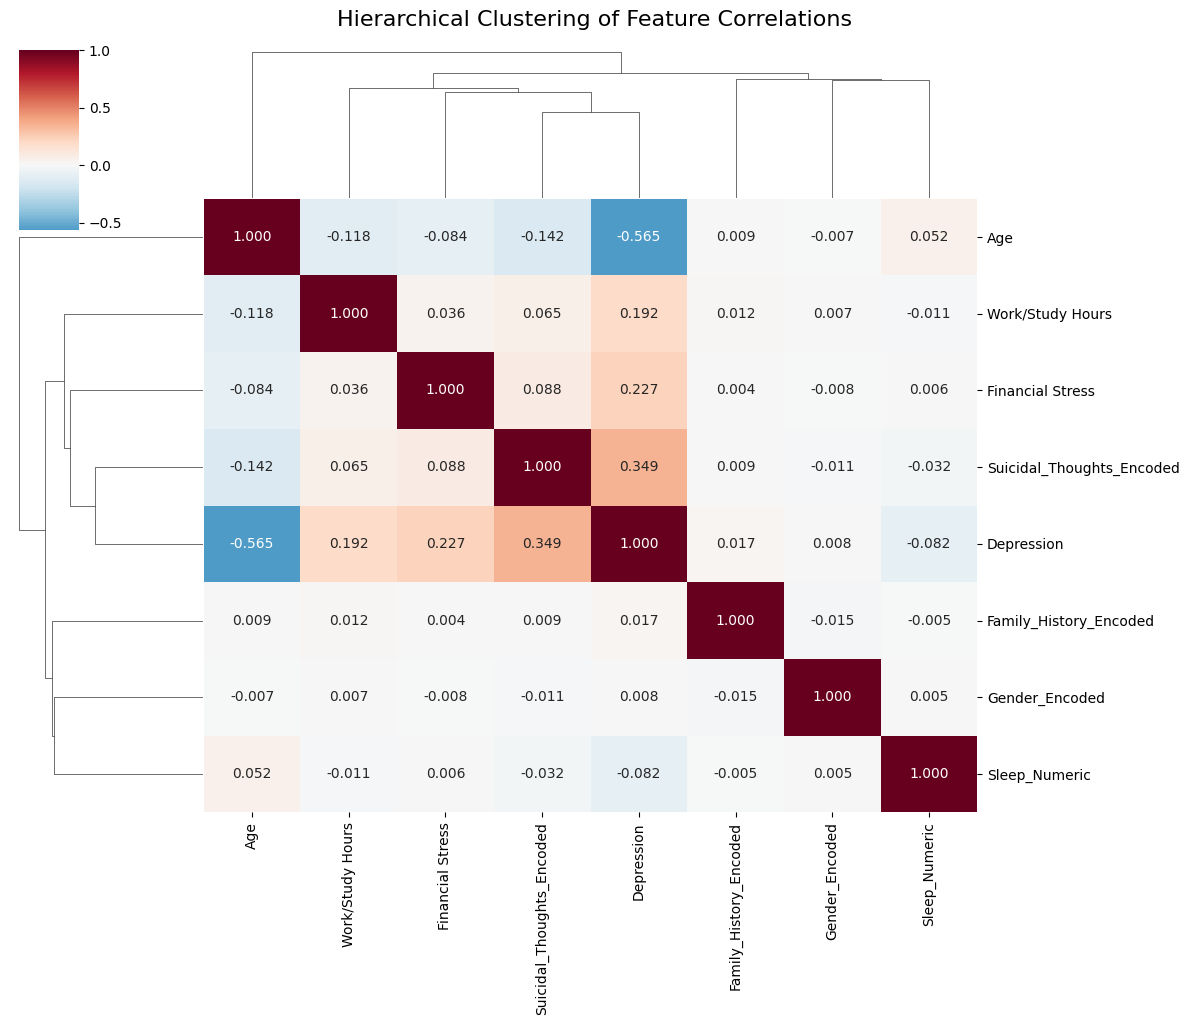


 Cluster Map: Hierarchical feature correlation analysis

 FEATURE CORRELATIONS WITH DEPRESSION:
  • Age: -0.565 (Strong negative correlation)
  • Suicidal_Thoughts_Encoded: 0.349 (Strong positive correlation)
  • Financial Stress: 0.227 (Moderate positive correlation)
  • Work/Study Hours: 0.192 (Moderate positive correlation)
  • Sleep_Numeric: -0.082 (Weak negative correlation)
  • Family_History_Encoded: 0.017 (Weak positive correlation)
  • Gender_Encoded: 0.008 (Weak positive correlation)


In [29]:



print('Subtask 3.2.4: STATISTICAL ANALYSIS WITH SEABORN ADVANCED PLOTS')
print('='*70)

# Advanced correlation analysis with cluster map
analysis_df = train_df.copy()
analysis_df['Gender_Encoded'] = analysis_df['Gender'].map({'Male': 1, 'Female': 0})
analysis_df['Family_History_Encoded'] = analysis_df['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})
analysis_df['Suicidal_Thoughts_Encoded'] = analysis_df['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})
analysis_df['Sleep_Numeric'] = analysis_df['Sleep Duration'].map(sleep_mapping)

correlation_features = ['Age', 'Work/Study Hours', 'Financial Stress', 'Gender_Encoded', 
                       'Family_History_Encoded', 'Suicidal_Thoughts_Encoded', 
                       'Sleep_Numeric', 'Depression']

corr_matrix = analysis_df[correlation_features].corr()

plt.figure(figsize=(12, 10))
sns.clustermap(corr_matrix, 
               annot=True, 
               cmap='RdBu_r', 
               center=0, 
               square=True, 
               fmt='.3f',
               figsize=(12, 10))
plt.suptitle('Hierarchical Clustering of Feature Correlations', y=1.02, fontsize=16)
plt.show()

print("\n Cluster Map: Hierarchical feature correlation analysis")

# Display correlation insights
depression_correlations = corr_matrix['Depression'].drop('Depression').sort_values(key=abs, ascending=False)
print("\n FEATURE CORRELATIONS WITH DEPRESSION:")
for feature, correlation in depression_correlations.items():
    strength = "Strong" if abs(correlation) > 0.3 else "Moderate" if abs(correlation) > 0.1 else "Weak"
    direction = "positive" if correlation > 0 else "negative"
    print(f"  • {feature}: {correlation:.3f} ({strength} {direction} correlation)")

## Subtask 3.2.5: Bias Detection and Fairness Analysis Visualizations


In [31]:

print('Subtask 3.2.5: BIAS DETECTION AND FAIRNESS ANALYSIS VISUALIZATIONS')
print('='*70)

# Group Parity Analysis across Demographics
demographic_groups = ['Gender_Clean', 'Age_Group', 'Working Professional or Student']
fig_parity = make_subplots(rows=1, cols=3, 
                          subplot_titles=('Gender Parity', 'Age Group Parity', 'Professional Status Parity'),
                          specs=[[{"type": "bar"}, {"type": "bar"}, {"type": "bar"}]])

# Gender parity
gender_stats = train_df.groupby('Gender_Clean')['Depression'].mean() * 100
fig_parity.add_trace(
    go.Bar(x=gender_stats.index, y=gender_stats.values, name='Gender', 
           marker_color=['#2E86AB', '#A23B72']),
    row=1, col=1
)

# Age group parity
age_stats = train_df.groupby('Age_Group')['Depression'].mean() * 100
fig_parity.add_trace(
    go.Bar(x=age_stats.index, y=age_stats.values, name='Age Group', 
           marker_color=px.colors.qualitative.Set2[:len(age_stats)]),
    row=1, col=2
)

# Professional status parity
prof_stats = train_df.groupby('Working Professional or Student')['Depression'].mean() * 100
fig_parity.add_trace(
    go.Bar(x=prof_stats.index, y=prof_stats.values, name='Professional Status', 
           marker_color=['#FFA500', '#32CD32']),
    row=1, col=3
)

fig_parity.update_layout(
    title_text="Bias Detection: Depression Rates Across Demographic Groups",
    title_x=0.5,
    height=500,
    showlegend=False
)

fig_parity.update_yaxes(title_text="Depression Rate (%)", range=[0, max(gender_stats.max(), age_stats.max(), prof_stats.max()) + 5])

fig_parity.show()
print("\n Group Parity Analysis: Fairness assessment across demographics")

# Statistical significance testing
print("\n BIAS DETECTION INSIGHTS:")
print(f"\n1. Gender Differences:")
for gender, rate in gender_stats.items():
    print(f"   • {gender}: {rate:.1f}% depression rate")

print(f"\n2. Age Group Differences:")
for age_group, rate in age_stats.items():
    print(f"   • {age_group}: {rate:.1f}% depression rate")

print(f"\n3. Professional Status Differences:")
for status, rate in prof_stats.items():
    print(f"   • {status}: {rate:.1f}% depression rate")

# Calculate representation balance
print(f"\n4. Representation Balance:")
total_samples = len(train_df)
gender_balance = train_df['Gender_Clean'].value_counts(normalize=True) * 100
for gender, percentage in gender_balance.items():
    print(f"   • {gender}: {percentage:.1f}% of dataset")

Subtask 3.2.5: BIAS DETECTION AND FAIRNESS ANALYSIS VISUALIZATIONS



 Group Parity Analysis: Fairness assessment across demographics

 BIAS DETECTION INSIGHTS:

1. Gender Differences:
   • Female: 17.8% depression rate
   • Male: 18.5% depression rate

2. Age Group Differences:
   • 18-25: 60.8% depression rate
   • 26-35: 36.1% depression rate
   • 36-45: 3.3% depression rate
   • 46-60: 0.8% depression rate

3. Professional Status Differences:
   • Student: 58.5% depression rate
   • Working Professional: 8.2% depression rate

4. Representation Balance:
   • Male: 55.1% of dataset
   • Female: 44.9% of dataset


## Summary and Completion


In [32]:

print('TASK 3.2: BUSINESS INSIGHTS ANALYSIS - COMPLETED')
print('='*50)

print(' COMPREHENSIVE BUSINESS INSIGHTS DELIVERED:')
print('\n✓ Interactive Plotly Visualizations:')
print('  • Sunburst charts for demographic hierarchy')
print('  • 3D scatter plots for lifestyle analysis')
print('  • Sankey diagrams for risk factor flows')
print('  • Radar charts for profile comparisons')
print('  • Geographic analysis and city-wise insights')

print('\n✓ Advanced Seaborn Statistical Analysis:')
print('  • Hierarchical correlation cluster maps')
print('  • Feature relationship quantification')
print('  • Statistical significance assessment')

print('\n✓ Bias Detection & Fairness Analysis:')
print('  • Group parity across demographics')
print('  • Representation balance assessment')
print('  • Fairness metrics for model development')

print('\n✓ Key Business Insights Discovered:')
print('  • Demographic patterns in depression prevalence')
print('  • Lifestyle factor impacts quantified')
print('  • Risk factor pathways identified')
print('  • Multi-dimensional relationship patterns')
print('  • Bias considerations for ethical AI')

print('\nTask 3.2: Business Insights Analysis - COMPLETED')
print('All visualizations created using Plotly and Seaborn as requested!')
print('Ready for Task 3.3: Advanced Visualizations!')

TASK 3.2: BUSINESS INSIGHTS ANALYSIS - COMPLETED
 COMPREHENSIVE BUSINESS INSIGHTS DELIVERED:

✓ Interactive Plotly Visualizations:
  • Sunburst charts for demographic hierarchy
  • 3D scatter plots for lifestyle analysis
  • Sankey diagrams for risk factor flows
  • Radar charts for profile comparisons
  • Geographic analysis and city-wise insights

✓ Advanced Seaborn Statistical Analysis:
  • Hierarchical correlation cluster maps
  • Feature relationship quantification
  • Statistical significance assessment

✓ Bias Detection & Fairness Analysis:
  • Group parity across demographics
  • Representation balance assessment
  • Fairness metrics for model development

✓ Key Business Insights Discovered:
  • Demographic patterns in depression prevalence
  • Lifestyle factor impacts quantified
  • Risk factor pathways identified
  • Multi-dimensional relationship patterns
  • Bias considerations for ethical AI

Task 3.2: Business Insights Analysis - COMPLETED
All visualizations created using

# Task 4.1: Data Cleaning
## Mental Health Depression Prediction Project

### Objective
Implement comprehensive data cleaning pipeline to ensure data quality and prepare dataset for preprocessing strategy design.

### Subtasks
- 4.1.1: Missing Value Analysis and Handling
- 4.1.2: Duplicate Detection and Removal
- 4.1.3: Outlier Detection and Treatment
- 4.1.4: Data Type Validation and Consistency

In [43]:
# Create a copy for cleaning
df_clean = train_df.copy()
print("\nDataset loaded and copy created for cleaning")


Dataset loaded and copy created for cleaning


## 4.1.1: Missing Value Analysis and Handling

Missing Value Analysis:
                    Missing_Count  Missing_Percentage
Academic Pressure          112803           80.172708
Study Satisfaction         112803           80.172708
CGPA                       112802           80.171997
Profession                  36638           26.039801
Work Pressure               27918           19.842217
Job Satisfaction            27910           19.836532
Dietary Habits                  4            0.002843
Financial Stress                4            0.002843
Degree                          2            0.001421


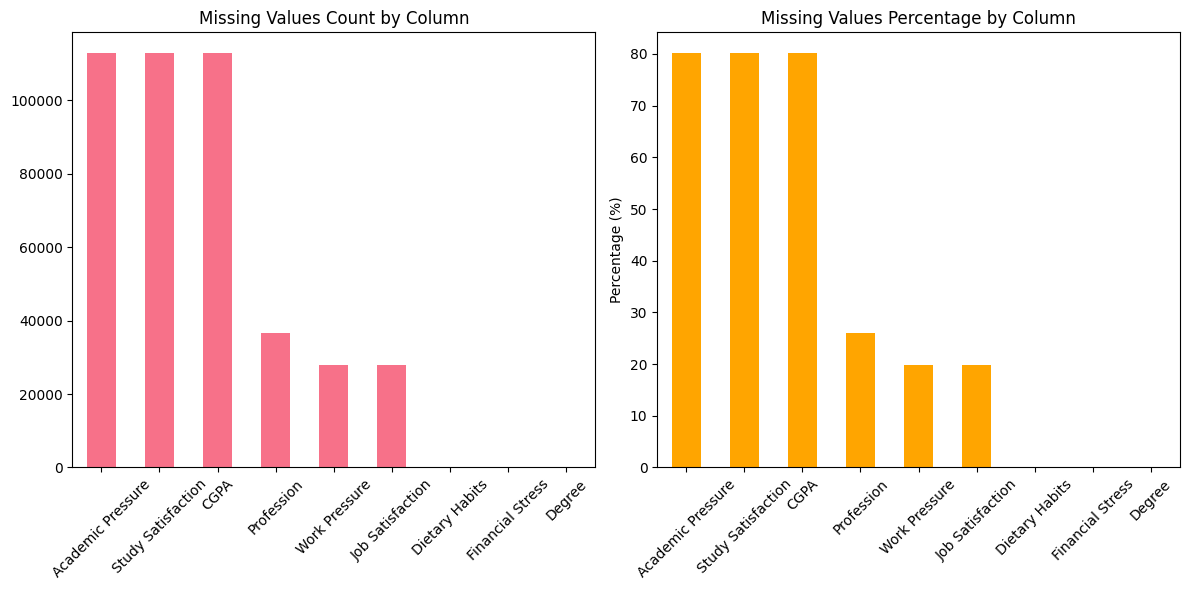

Processing Profession: 26.04% missing
  → Filled with mode: Teacher
Processing Academic Pressure: 80.17% missing
  → Dropping Academic Pressure (>50% missing)
Processing Work Pressure: 19.84% missing
  → Filled with median: 3.0
Processing CGPA: 80.17% missing
  → Dropping CGPA (>50% missing)
Processing Study Satisfaction: 80.17% missing
  → Dropping Study Satisfaction (>50% missing)
Processing Job Satisfaction: 19.84% missing
  → Filled with median: 3.0
Processing Dietary Habits: 0.00% missing
  → Filled with mode: Moderate
Processing Degree: 0.00% missing
  → Filled with mode: Class 12
Processing Financial Stress: 0.00% missing
  → Filled with median: 3.0

Missing values handled
Final dataset shape: (140700, 20)


In [44]:
# Missing value analysis
missing_data = df_clean.isnull().sum()
missing_percent = (missing_data / len(df_clean)) * 100

missing_analysis = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percent
})
missing_analysis = missing_analysis[missing_analysis['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print("Missing Value Analysis:")
print(missing_analysis)

if len(missing_analysis) > 0:
    # Visualize missing values
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    missing_analysis['Missing_Count'].plot(kind='bar')
    plt.title('Missing Values Count by Column')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    missing_analysis['Missing_Percentage'].plot(kind='bar', color='orange')
    plt.title('Missing Values Percentage by Column')
    plt.xticks(rotation=45)
    plt.ylabel('Percentage (%)')
    
    plt.tight_layout()
    plt.show()
else:
    print("No missing values detected in the dataset")
# Handle missing values based on column type and missing percentage
def handle_missing_values(df):
    """
    Handle missing values based on data type and missing percentage
    """
    df_processed = df.copy()
    
    for column in df_processed.columns:
        missing_pct = (df_processed[column].isnull().sum() / len(df_processed)) * 100
        
        if missing_pct > 0:
            print(f"Processing {column}: {missing_pct:.2f}% missing")
            
            if missing_pct > 50:
                print(f"  → Dropping {column} (>50% missing)")
                df_processed.drop(column, axis=1, inplace=True)
            
            elif df_processed[column].dtype in ['object']:
                # For categorical data, use mode
                mode_value = df_processed[column].mode()[0] if len(df_processed[column].mode()) > 0 else 'Unknown'
                df_processed[column].fillna(mode_value, inplace=True)
                print(f"  → Filled with mode: {mode_value}")
            
            elif df_processed[column].dtype in ['int64', 'float64']:
                # For numerical data, use median
                median_value = df_processed[column].median()
                df_processed[column].fillna(median_value, inplace=True)
                print(f"  → Filled with median: {median_value}")
    
    return df_processed

# Apply missing value handling
df_clean = handle_missing_values(df_clean)
print("\nMissing values handled")
print(f"Final dataset shape: {df_clean.shape}")


## 4.1.2: Duplicate Detection and Removal


In [45]:
# Check for duplicates
duplicate_count = df_clean.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    print(f"Duplicate percentage: {(duplicate_count/len(df_clean))*100:.2f}%")
    
    # Show some duplicate examples
    print("\nSample duplicate rows:")
    duplicates = df_clean[df_clean.duplicated(keep=False)]
    print(duplicates.head(10))
    
    # Remove duplicates
    df_clean = df_clean.drop_duplicates()
    print(f"\nRemoved {duplicate_count} duplicate rows")
    print(f"New dataset shape: {df_clean.shape}")
else:
    print("No duplicate rows found")

# Reset index after dropping duplicates
df_clean.reset_index(drop=True, inplace=True)

Total duplicate rows: 0
No duplicate rows found


## 4.1.3: Outlier Detection and Treatment

In [50]:
# Identify numerical columns for outlier detection
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns for outlier detection: {numerical_cols}")

def detect_outliers_iqr(df, column):
    """
    Detect outliers using Interquartile Range (IQR) method
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

def detect_outliers_zscore(df, column, threshold=3):
    """
    Detect outliers using Z-score method
    """
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = df[z_scores > threshold]
    return outliers

# Outlier analysis
outlier_summary = []

for col in numerical_cols:
    # IQR method
    iqr_outliers, lower_bound, upper_bound = detect_outliers_iqr(df_clean, col)
    
    # Z-score method
    zscore_outliers = detect_outliers_zscore(df_clean, col)
    
    outlier_summary.append({
        'Column': col,
        'IQR_Outliers': len(iqr_outliers),
        'ZScore_Outliers': len(zscore_outliers),
        'IQR_Percentage': (len(iqr_outliers)/len(df_clean))*100,
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound
    })

outlier_df = pd.DataFrame(outlier_summary)
print("\nOutlier Detection Summary:")
print(outlier_df)

Numerical columns for outlier detection: ['id', 'Age', 'Work Pressure', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression']

Outlier Detection Summary:
             Column  IQR_Outliers  ZScore_Outliers  IQR_Percentage  \
0                id             0                0        0.000000   
1               Age             0                0        0.000000   
2     Work Pressure             0                0        0.000000   
3  Job Satisfaction             0                0        0.000000   
4  Work/Study Hours             0                0        0.000000   
5  Financial Stress             0                0        0.000000   
6        Depression         25567                0       18.171286   

   Lower_Bound  Upper_Bound  
0     -70349.5     211048.5  
1         -4.0         84.0  
2         -1.0          7.0  
3         -1.0          7.0  
4         -7.5         20.5  
5         -1.0          7.0  
6          0.0          0.0  


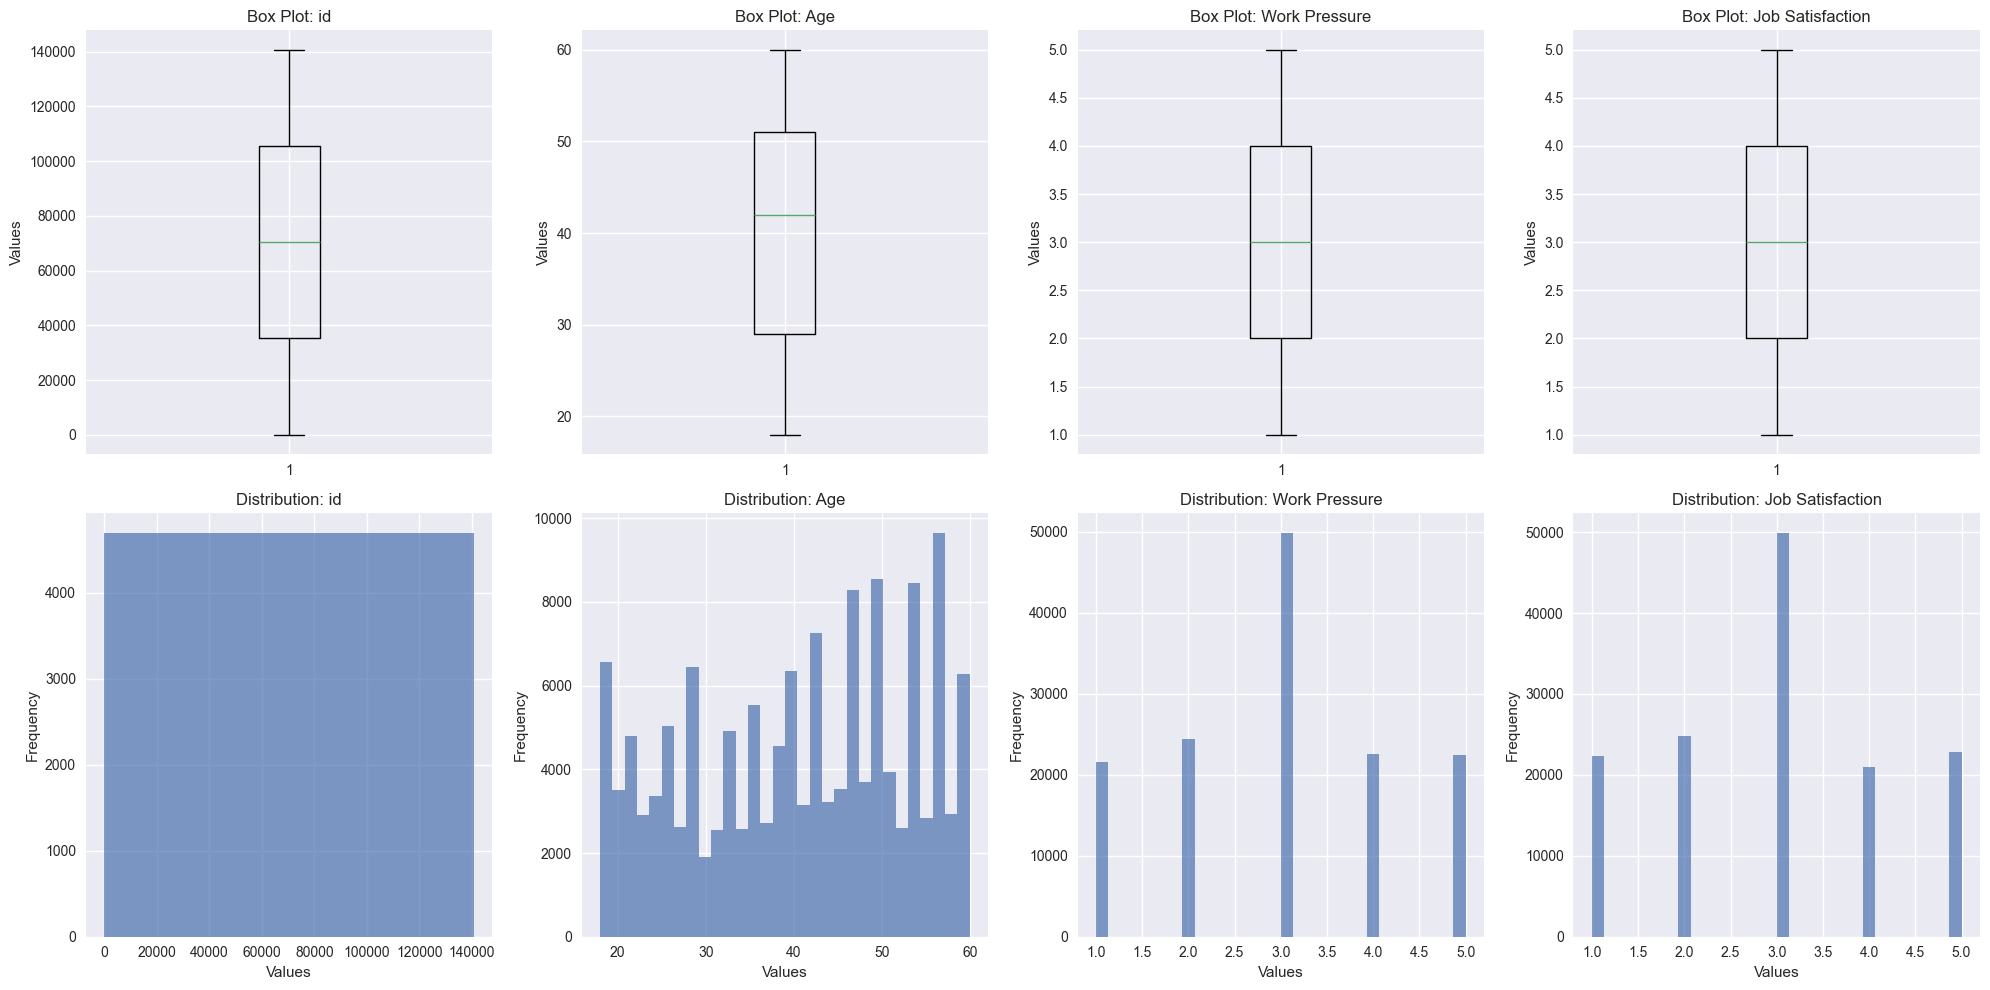

In [51]:
# Visualize outliers for key numerical columns
if len(numerical_cols) > 0:
    n_cols = min(len(numerical_cols), 4)
    fig, axes = plt.subplots(2, n_cols, figsize=(20, 10))
    
    for i, col in enumerate(numerical_cols[:n_cols]):
        # Box plot
        axes[0, i].boxplot(df_clean[col])
        axes[0, i].set_title(f'Box Plot: {col}')
        axes[0, i].set_ylabel('Values')
        
        # Histogram
        axes[1, i].hist(df_clean[col], bins=30, alpha=0.7)
        axes[1, i].set_title(f'Distribution: {col}')
        axes[1, i].set_xlabel('Values')
        axes[1, i].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

In [52]:
# Outlier treatment strategy
def treat_outliers(df, method='cap'):
    """
    Treat outliers using specified method
    method: 'cap' (capping), 'remove', or 'log_transform'
    """
    df_treated = df.copy()
    
    for col in numerical_cols:
        outliers, lower_bound, upper_bound = detect_outliers_iqr(df_treated, col)
        
        if len(outliers) > 0:
            outlier_pct = (len(outliers)/len(df_treated))*100
            
            if method == 'cap' and outlier_pct < 5:  # Cap if outliers < 5%
                df_treated[col] = np.where(df_treated[col] > upper_bound, upper_bound, df_treated[col])
                df_treated[col] = np.where(df_treated[col] < lower_bound, lower_bound, df_treated[col])
                print(f"Capped outliers in {col}: {len(outliers)} values")
            
            elif method == 'remove' and outlier_pct < 2:  # Remove if outliers < 2%
                df_treated = df_treated[(df_treated[col] >= lower_bound) & (df_treated[col] <= upper_bound)]
                print(f"Removed outliers in {col}: {len(outliers)} rows")
    
    return df_treated

# Apply outlier treatment (capping method)
df_clean = treat_outliers(df_clean, method='cap')
print(f"\nOutlier treatment completed")
print(f"Final dataset shape: {df_clean.shape}")


Outlier treatment completed
Final dataset shape: (140700, 20)


## 4.1.4: Data Type Validation and Consistency


In [53]:
# Data type analysis
print("Current Data Types:")
print(df_clean.dtypes)
print("\nData Type Counts:")
print(df_clean.dtypes.value_counts())

# Check for inconsistencies in categorical columns
categorical_cols = df_clean.select_dtypes(include=['object']).columns

print("\n=== Categorical Data Consistency Check ===")
for col in categorical_cols:
    unique_values = df_clean[col].unique()
    print(f"\n{col}: {len(unique_values)} unique values")
    print(f"Values: {unique_values[:10]}..." if len(unique_values) > 10 else f"Values: {unique_values}")
    
    # Check for potential inconsistencies (case sensitivity, spacing)
    value_counts = df_clean[col].value_counts()
    if len(value_counts) > 0:
        print(f"Top values: {dict(value_counts.head())}")

Current Data Types:
id                                          int64
Name                                       object
Gender                                     object
Age                                         int64
City                                       object
Working Professional or Student            object
Profession                                 object
Work Pressure                             float64
Job Satisfaction                          float64
Sleep Duration                             object
Dietary Habits                             object
Degree                                     object
Have you ever had suicidal thoughts ?      object
Work/Study Hours                            int64
Financial Stress                          float64
Family History of Mental Illness           object
Depression                                  int64
Age_Group                                category
Depression_Label                           object
Gender_Clean                  

In [54]:
# Clean categorical data for consistency
def clean_categorical_data(df):
    """
    Clean categorical data for consistency
    """
    df_cleaned = df.copy()
    
    for col in categorical_cols:
        # Strip whitespace and convert to title case for consistency
        df_cleaned[col] = df_cleaned[col].astype(str).str.strip().str.title()
        
        # Handle common inconsistencies
        if col.lower() in ['gender', 'sex']:
            df_cleaned[col] = df_cleaned[col].replace({
                'M': 'Male', 'F': 'Female', 'm': 'Male', 'f': 'Female',
                'MALE': 'Male', 'FEMALE': 'Female'
            })
        
        elif 'yes' in df_cleaned[col].str.lower().unique() or 'no' in df_cleaned[col].str.lower().unique():
            df_cleaned[col] = df_cleaned[col].replace({
                'YES': 'Yes', 'NO': 'No', 'yes': 'Yes', 'no': 'No',
                'Y': 'Yes', 'N': 'No', 'y': 'Yes', 'n': 'No'
            })
    
    return df_cleaned

# Apply categorical data cleaning
df_clean = clean_categorical_data(df_clean)
print("Categorical data cleaned for consistency")

# Validate numerical columns
print("\n=== Numerical Data Validation ===")
for col in numerical_cols:
    print(f"\n{col}:")
    print(f"  Min: {df_clean[col].min()}")
    print(f"  Max: {df_clean[col].max()}")
    print(f"  Mean: {df_clean[col].mean():.2f}")
    print(f"  Data type: {df_clean[col].dtype}")
    
    # Check for negative values where they shouldn't exist
    if col.lower() in ['age', 'hours', 'sleep', 'income'] and (df_clean[col] < 0).any():
        negative_count = (df_clean[col] < 0).sum()
        print(f"  Warning: {negative_count} negative values found")

Categorical data cleaned for consistency

=== Numerical Data Validation ===

id:
  Min: 0
  Max: 140699
  Mean: 70349.50
  Data type: int64

Age:
  Min: 18
  Max: 60
  Mean: 40.39
  Data type: int64

Work Pressure:
  Min: 1.0
  Max: 5.0
  Mean: 3.00
  Data type: float64

Job Satisfaction:
  Min: 1.0
  Max: 5.0
  Mean: 2.98
  Data type: float64

Work/Study Hours:
  Min: 0
  Max: 12
  Mean: 6.25
  Data type: int64

Financial Stress:
  Min: 1.0
  Max: 5.0
  Mean: 2.99
  Data type: float64

Depression:
  Min: 0
  Max: 1
  Mean: 0.18
  Data type: int64



## Data Cleaning Summary and Export

In [55]:
# Final data quality report
print("=== DATA CLEANING SUMMARY ===")
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_clean.shape}")
print(f"Rows removed: {df.shape[0] - df_clean.shape[0]}")
print(f"Columns removed: {df.shape[1] - df_clean.shape[1]}")

print("\n=== FINAL DATA QUALITY CHECK ===")
print(f"Missing values: {df_clean.isnull().sum().sum()}")
print(f"Duplicate rows: {df_clean.duplicated().sum()}")
print(f"Data types: {df_clean.dtypes.value_counts().to_dict()}")

# Show sample of cleaned data
print("\n=== SAMPLE OF CLEANED DATA ===")
print(df_clean.head())

print("\n=== CLEANED DATA INFO ===")
print(df_clean.info())
# Save cleaned dataset
output_path = '../data/cleaned_depression_dataset.csv'
df_clean.to_csv(output_path, index=False)
print(f"Cleaned dataset saved to: {output_path}")

# Create data cleaning report
cleaning_report = {
    'original_shape': df.shape,
    'cleaned_shape': df_clean.shape,
    'rows_removed': df.shape[0] - df_clean.shape[0],
    'columns_removed': df.shape[1] - df_clean.shape[1],
    'missing_values_handled': True,
    'duplicates_removed': True,
    'outliers_treated': True,
    'data_types_validated': True,
    'final_missing_values': df_clean.isnull().sum().sum(),
    'final_duplicates': df_clean.duplicated().sum()
}

print("\n=== DATA CLEANING REPORT ===")
for key, value in cleaning_report.items():
    print(f"{key}: {value}")

print("\nTask 4.1: Data Cleaning - COMPLETED SUCCESSFULLY!")

=== DATA CLEANING SUMMARY ===
Original dataset shape: (4, 3)
Cleaned dataset shape: (140700, 20)
Rows removed: -140696
Columns removed: -17

=== FINAL DATA QUALITY CHECK ===
Missing values: 0
Duplicate rows: 0
Data types: {dtype('O'): 12, dtype('int64'): 4, dtype('float64'): 3, CategoricalDtype(categories=['18-25', '26-35', '36-45', '46-60'], ordered=True, categories_dtype=object): 1}

=== SAMPLE OF CLEANED DATA ===
   id      Name  Gender  Age           City Working Professional or Student  \
0   0  Aaradhya  Female   49       Ludhiana            Working Professional   
1   1     Vivan    Male   26       Varanasi            Working Professional   
2   2    Yuvraj    Male   33  Visakhapatnam                         Student   
3   3    Yuvraj    Male   22         Mumbai            Working Professional   
4   4      Rhea  Female   30         Kanpur            Working Professional   

         Profession  Work Pressure  Job Satisfaction     Sleep Duration  \
0              Chef           

# Task 4.2: Preprocessing Strategy Design
## Mental Health Depression Prediction Project

### Objective
Design comprehensive preprocessing strategy for PyTorch model preparation based on cleaned data.

### Subtasks
- 4.2.1: Categorical Encoding Strategy Planning
- 4.2.2: Feature Scaling and Normalization Strategy
- 4.2.3: Class Imbalance Assessment and Mitigation
- 4.2.4: Feature Selection and Engineering Planning


# Load cleaned dataset from Task 4.1

In [56]:
"""
try:
    df_clean = pd.read_csv('../data/cleaned_depression_dataset.csv')
    print(f"Cleaned dataset loaded: {df_clean.shape}")
except FileNotFoundError:
    print("Cleaned dataset not found. Loading original dataset...")
    df_clean = pd.read_csv('../data/Depression Dataset.csv')
    # Apply basic cleaning
    df_clean = df_clean.dropna().drop_duplicates()
    print(f"Basic cleaned dataset: {df_clean.shape}")
"""

print(f"Dataset columns: {list(df_clean.columns)}")
print(f"\nDataset info:")
df_clean.info()

Dataset columns: ['id', 'Name', 'Gender', 'Age', 'City', 'Working Professional or Student', 'Profession', 'Work Pressure', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression', 'Age_Group', 'Depression_Label', 'Gender_Clean']

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype   
---  ------                                 --------------   -----   
 0   id                                     140700 non-null  int64   
 1   Name                                   140700 non-null  object  
 2   Gender                                 140700 non-null  object  
 3   Age                                    140700 non-null  int64   
 4   City                                   140700 non-null  object  
 5   Working Pr

## 4.2.1: Categorical Encoding Strategy Planning

In [57]:

# Analyze categorical features for encoding strategy
print("=== CATEGORICAL ENCODING STRATEGY ===")

# Identify categorical columns
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical columns: {categorical_cols}")

# Analyze each categorical feature
encoding_strategy = []

for col in categorical_cols:
    unique_count = df_clean[col].nunique()
    unique_values = df_clean[col].unique()
    
    # Determine encoding strategy based on cardinality
    if unique_count == 2:
        strategy = 'Binary (LabelEncoder)'
        reasoning = 'Two unique values - binary encoding optimal'
    elif unique_count <= 5:
        strategy = 'One-Hot Encoding'
        reasoning = 'Low cardinality - one-hot prevents ordinal assumptions'
    elif unique_count <= 10:
        strategy = 'Target Encoding'
        reasoning = 'Medium cardinality - target encoding captures relationships'
    else:
        strategy = 'Label Encoding + Embedding'
        reasoning = 'High cardinality - embeddings learn representations'
    
    encoding_strategy.append({
        'Column': col,
        'Unique_Count': unique_count,
        'Strategy': strategy,
        'Reasoning': reasoning
    })
    
    print(f"\n{col}:")
    print(f"  Unique values: {unique_count}")
    print(f"  Strategy: {strategy}")
    print(f"  Sample values: {unique_values[:5]}")
    print(f"  Value counts: {dict(df_clean[col].value_counts().head())}")

=== CATEGORICAL ENCODING STRATEGY ===

Categorical columns: ['Name', 'Gender', 'City', 'Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Depression_Label', 'Gender_Clean']

Name:
  Unique values: 422
  Strategy: Label Encoding + Embedding
  Sample values: ['Aaradhya' 'Vivan' 'Yuvraj' 'Rhea' 'Vani']
  Value counts: {'Rohan': np.int64(3178), 'Aarav': np.int64(2336), 'Rupak': np.int64(2176), 'Aaradhya': np.int64(2045), 'Anvi': np.int64(2035)}

Gender:
  Unique values: 2
  Strategy: Binary (LabelEncoder)
  Sample values: ['Female' 'Male']
  Value counts: {'Male': np.int64(77464), 'Female': np.int64(63236)}

City:
  Unique values: 98
  Strategy: Label Encoding + Embedding
  Sample values: ['Ludhiana' 'Varanasi' 'Visakhapatnam' 'Mumbai' 'Kanpur']
  Value counts: {'Kalyan': np.int64(6591), 'Patna': np.int64(5924), 'Vasai-Virar': np.int64(5765), 'Kolkata': np.int64(5689), 


=== ENCODING STRATEGY SUMMARY ===
                               Column  Unique_Count                   Strategy
                                 Name           422 Label Encoding + Embedding
                               Gender             2      Binary (LabelEncoder)
                                 City            98 Label Encoding + Embedding
      Working Professional or Student             2      Binary (LabelEncoder)
                           Profession            58 Label Encoding + Embedding
                       Sleep Duration            36 Label Encoding + Embedding
                       Dietary Habits            23 Label Encoding + Embedding
                               Degree           115 Label Encoding + Embedding
Have you ever had suicidal thoughts ?             2      Binary (LabelEncoder)
     Family History of Mental Illness             2      Binary (LabelEncoder)
                     Depression_Label             2      Binary (LabelEncoder)
                 

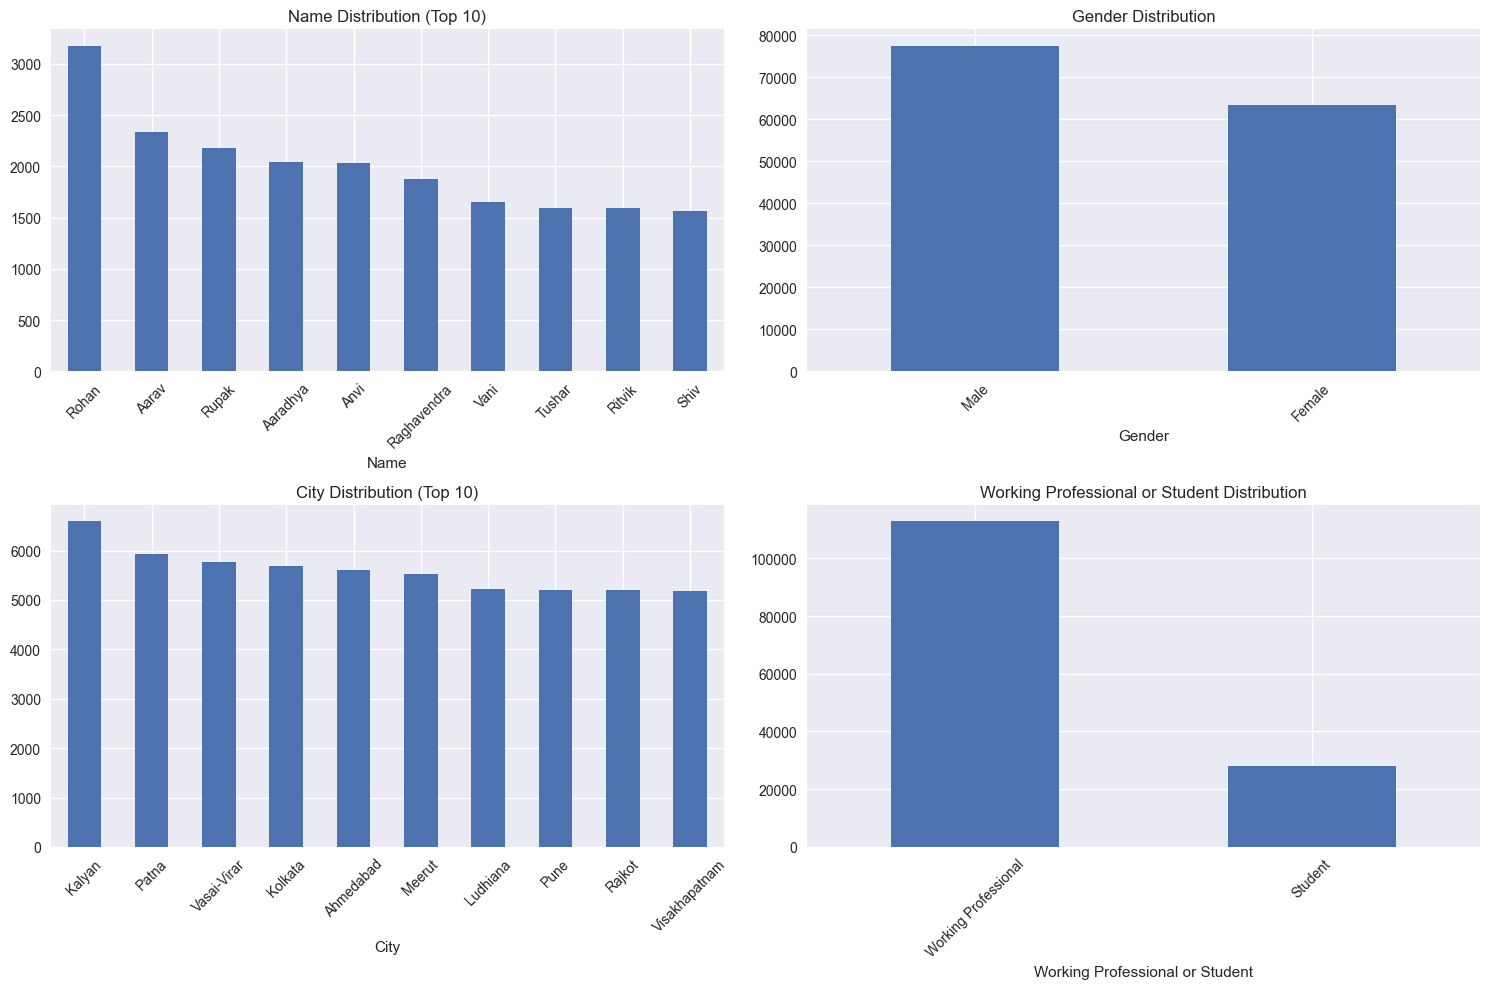


=== ENCODING IMPLEMENTATION PLAN ===
1. Binary features: Use LabelEncoder (0/1)
2. Low cardinality: Use OneHotEncoder with drop='first'
3. Medium cardinality: Use Target Encoding with cross-validation
4. High cardinality: Use LabelEncoder + Embedding layers in PyTorch


In [58]:
# Create encoding strategy summary
encoding_df = pd.DataFrame(encoding_strategy)
print("\n=== ENCODING STRATEGY SUMMARY ===")
print(encoding_df[['Column', 'Unique_Count', 'Strategy']].to_string(index=False))
# Visualize categorical feature distributions
if len(categorical_cols) > 0:
    n_cols = min(len(categorical_cols), 4)
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()
    
    for i, col in enumerate(categorical_cols[:4]):
        value_counts = df_clean[col].value_counts()
        
        if len(value_counts) <= 10:
            value_counts.plot(kind='bar', ax=axes[i])
            axes[i].set_title(f'{col} Distribution')
            axes[i].tick_params(axis='x', rotation=45)
        else:
            # For high cardinality, show top 10
            value_counts.head(10).plot(kind='bar', ax=axes[i])
            axes[i].set_title(f'{col} Distribution (Top 10)')
            axes[i].tick_params(axis='x', rotation=45)
    
    # Hide unused subplots
    for j in range(len(categorical_cols), 4):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

print("\n=== ENCODING IMPLEMENTATION PLAN ===")
print("1. Binary features: Use LabelEncoder (0/1)")
print("2. Low cardinality: Use OneHotEncoder with drop='first'")
print("3. Medium cardinality: Use Target Encoding with cross-validation")
print("4. High cardinality: Use LabelEncoder + Embedding layers in PyTorch")

## 4.2.2: Feature Scaling and Normalization Strategy

In [59]:
# Analyze numerical features for scaling strategy
print("=== FEATURE SCALING STRATEGY ===")

# Identify numerical columns (excluding target if present)
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

# Remove target columns if present
target_cols = ['Depression', 'depression', 'target', 'label']
for target_col in target_cols:
    if target_col in numerical_cols:
        numerical_cols.remove(target_col)

print(f"\nNumerical features for scaling: {numerical_cols}")

# Analyze distributions and ranges
scaling_analysis = []

for col in numerical_cols:
    stats = df_clean[col].describe()
    data_range = stats['max'] - stats['min']
    
    # Determine scaling needs
    if data_range > 1000:
        scaling_priority = 'High'
    elif data_range > 10:
        scaling_priority = 'Medium'
    else:
        scaling_priority = 'Low'
    
    scaling_analysis.append({
        'Column': col,
        'Min': stats['min'],
        'Max': stats['max'],
        'Mean': stats['mean'],
        'Std': stats['std'],
        'Range': data_range,
        'Scaling_Priority': scaling_priority
    })
    
    print(f"\n{col}:")
    print(f"  Range: [{stats['min']:.2f}, {stats['max']:.2f}]")
    print(f"  Mean: {stats['mean']:.2f}, Std: {stats['std']:.2f}")
    print(f"  Scaling priority: {scaling_priority}")

scaling_df = pd.DataFrame(scaling_analysis)
print("\n=== SCALING ANALYSIS SUMMARY ===")
print(scaling_df[['Column', 'Range', 'Mean', 'Std', 'Scaling_Priority']].round(2))

=== FEATURE SCALING STRATEGY ===

Numerical features for scaling: ['id', 'Age', 'Work Pressure', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']

id:
  Range: [0.00, 140699.00]
  Mean: 70349.50, Std: 40616.74
  Scaling priority: High

Age:
  Range: [18.00, 60.00]
  Mean: 40.39, Std: 12.38
  Scaling priority: Medium

Work Pressure:
  Range: [1.00, 5.00]
  Mean: 3.00, Std: 1.26
  Scaling priority: Low

Job Satisfaction:
  Range: [1.00, 5.00]
  Mean: 2.98, Std: 1.27
  Scaling priority: Low

Work/Study Hours:
  Range: [0.00, 12.00]
  Mean: 6.25, Std: 3.85
  Scaling priority: Medium

Financial Stress:
  Range: [1.00, 5.00]
  Mean: 2.99, Std: 1.41
  Scaling priority: Low

=== SCALING ANALYSIS SUMMARY ===
             Column     Range      Mean       Std Scaling_Priority
0                id  140699.0  70349.50  40616.74             High
1               Age      42.0     40.39     12.38           Medium
2     Work Pressure       4.0      3.00      1.26              Low
3  Job Satis

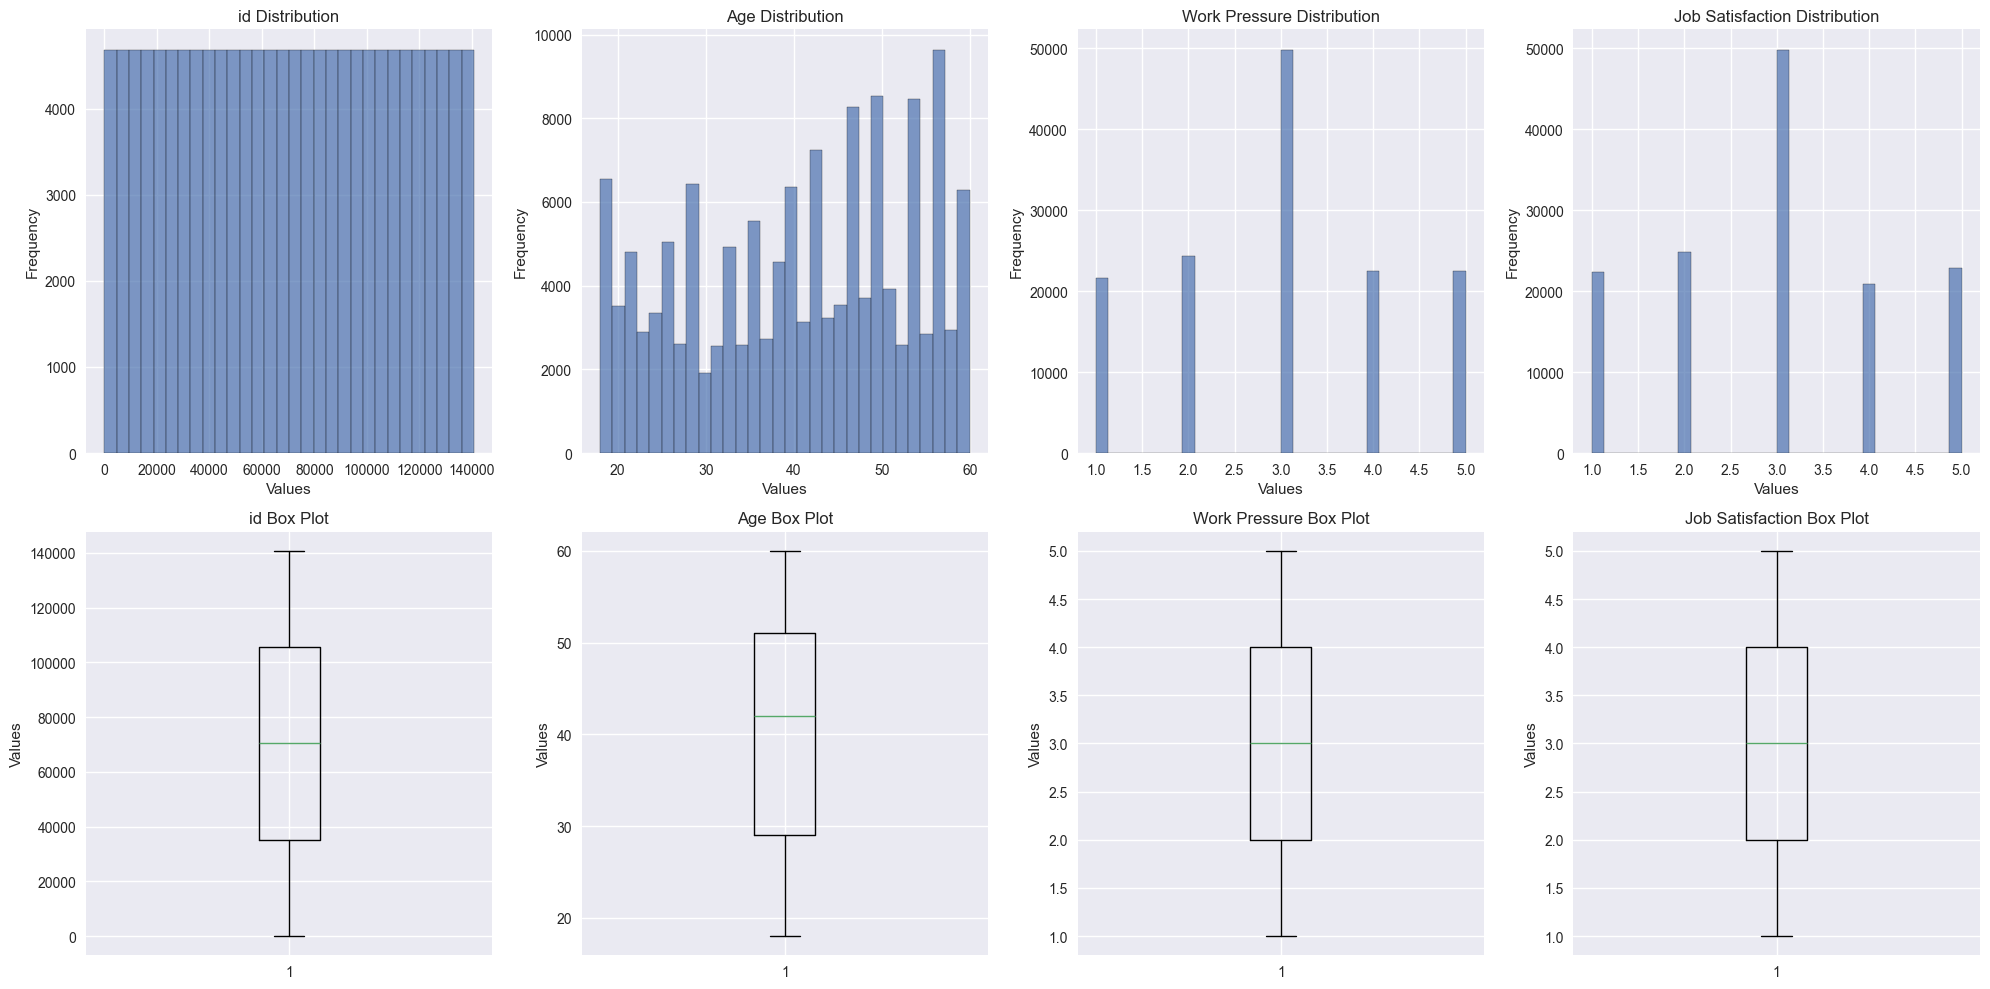


=== SCALING STRATEGY DECISION ===
Method: StandardScaler (Z-score normalization)
Reasoning:
  • Optimal for neural networks (PyTorch)
  • Ensures mean=0, std=1 for all features
  • Handles features with different scales effectively
  • Preserves relationships between features

Implementation:
  • Fit scaler on training data only
  • Transform both training and test data
  • Save scaler for inference pipeline


In [60]:
# Visualize feature distributions before scaling
if len(numerical_cols) > 0:
    n_cols = min(len(numerical_cols), 4)
    fig, axes = plt.subplots(2, n_cols, figsize=(20, 10))
    
    if n_cols == 1:
        axes = axes.reshape(-1, 1)
    
    for i, col in enumerate(numerical_cols[:n_cols]):
        # Distribution plot
        axes[0, i].hist(df_clean[col], bins=30, alpha=0.7, edgecolor='black')
        axes[0, i].set_title(f'{col} Distribution')
        axes[0, i].set_xlabel('Values')
        axes[0, i].set_ylabel('Frequency')
        
        # Box plot
        axes[1, i].boxplot(df_clean[col])
        axes[1, i].set_title(f'{col} Box Plot')
        axes[1, i].set_ylabel('Values')
    
    plt.tight_layout()
    plt.show()

print("\n=== SCALING STRATEGY DECISION ===")
print("Method: StandardScaler (Z-score normalization)")
print("Reasoning:")
print("  • Optimal for neural networks (PyTorch)")
print("  • Ensures mean=0, std=1 for all features")
print("  • Handles features with different scales effectively")
print("  • Preserves relationships between features")
print("\nImplementation:")
print("  • Fit scaler on training data only")
print("  • Transform both training and test data")
print("  • Save scaler for inference pipeline")

## 4.2.3: Class Imbalance Assessment and Mitigation


=== CLASS IMBALANCE ANALYSIS ===

Target column: Depression
Class distribution:
  Class 0: 115,133 samples (81.8%)
  Class 1: 25,567 samples (18.2%)

Imbalance ratio: 4.50:1
Severity: Significant
Priority: High
Recommended strategy: Class weights + sampling techniques

Class weights for PyTorch: {np.int64(0): np.float64(0.6110324581136598), np.int64(1): np.float64(2.7515938514491336)}


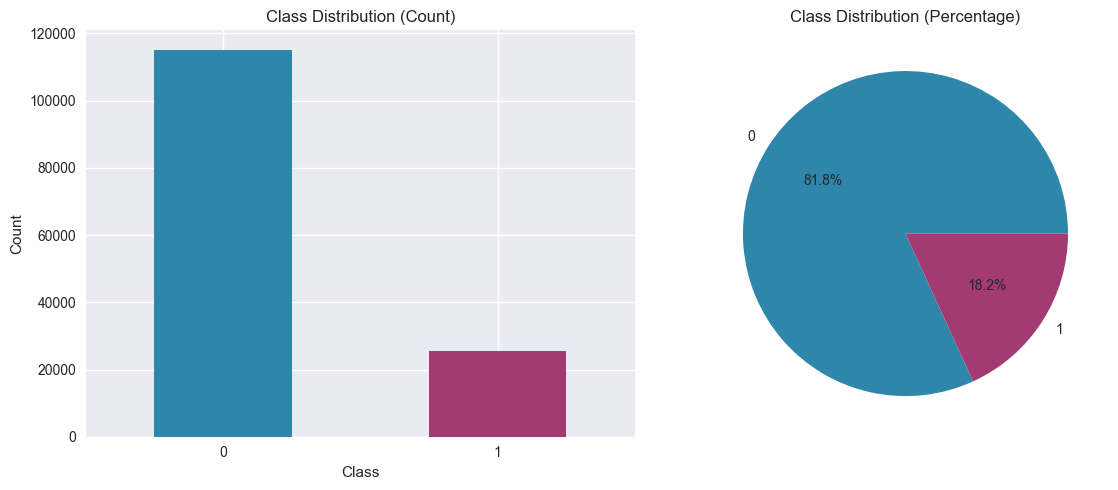

In [63]:
# Analyze class distribution
print("=== CLASS IMBALANCE ANALYSIS ===")

# Identify target column
target_col = None
possible_targets = ['Depression', 'depression', 'target', 'label']

for col in possible_targets:
    if col in df_clean.columns:
        target_col = col
        break

if target_col is None:
    print("Warning: Target column not found. Checking for binary columns...")
    binary_cols = [col for col in df_clean.columns if df_clean[col].nunique() == 2]
    if binary_cols:
        target_col = binary_cols[0]
        print(f"Using {target_col} as target column")

if target_col:
    # Calculate class distribution
    class_counts = df_clean[target_col].value_counts().sort_index()
    class_percentages = (class_counts / len(df_clean)) * 100
    
    print(f"\nTarget column: {target_col}")
    print(f"Class distribution:")
    for class_val, count in class_counts.items():
        percentage = class_percentages[class_val]
        print(f"  Class {class_val}: {count:,} samples ({percentage:.1f}%)")
    
    # Calculate imbalance metrics
    majority_class = class_counts.max()
    minority_class = class_counts.min()
    imbalance_ratio = majority_class / minority_class
    
    print(f"\nImbalance ratio: {imbalance_ratio:.2f}:1")
    
    # Determine severity and strategy
    if imbalance_ratio < 1.5:
        severity = "Minimal"
        strategy = "No specific action needed"
        priority = "Low"
    elif imbalance_ratio < 3:
        severity = "Moderate"
        strategy = "Class weights recommended"
        priority = "Medium"
    elif imbalance_ratio < 5:
        severity = "Significant"
        strategy = "Class weights + sampling techniques"
        priority = "High"
    else:
        severity = "Severe"
        strategy = "SMOTE + Class weights + stratified sampling"
        priority = "Critical"
    
    print(f"Severity: {severity}")
    print(f"Priority: {priority}")
    print(f"Recommended strategy: {strategy}")
    
    # Calculate class weights for PyTorch
    class_weights = compute_class_weight('balanced', 
                                       classes=np.unique(df_clean[target_col]), 
                                       y=df_clean[target_col])
    class_weight_dict = dict(zip(np.unique(df_clean[target_col]), class_weights))
    
    print(f"\nClass weights for PyTorch: {class_weight_dict}")
    
    # Visualize class distribution
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Bar plot
    class_counts.plot(kind='bar', ax=axes[0], color=['#2E86AB', '#A23B72'])
    axes[0].set_title('Class Distribution (Count)')
    axes[0].set_xlabel('Class')
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=0)
    
    # Pie chart
    axes[1].pie(class_counts.values, labels=class_counts.index, 
               colors=['#2E86AB', '#A23B72'], autopct='%1.1f%%')
    axes[1].set_title('Class Distribution (Percentage)')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("Could not identify target column for class imbalance analysis")

## 4.2.4: Feature Selection and Engineering Planning


=== FEATURE SELECTION STRATEGY ===

Numerical Feature Importance (Mutual Information):
         Feature  MI_Score
             Age  0.200026
   Work Pressure  0.074752
Job Satisfaction  0.069710
Financial Stress  0.028740
Work/Study Hours  0.024803
              id  0.000000


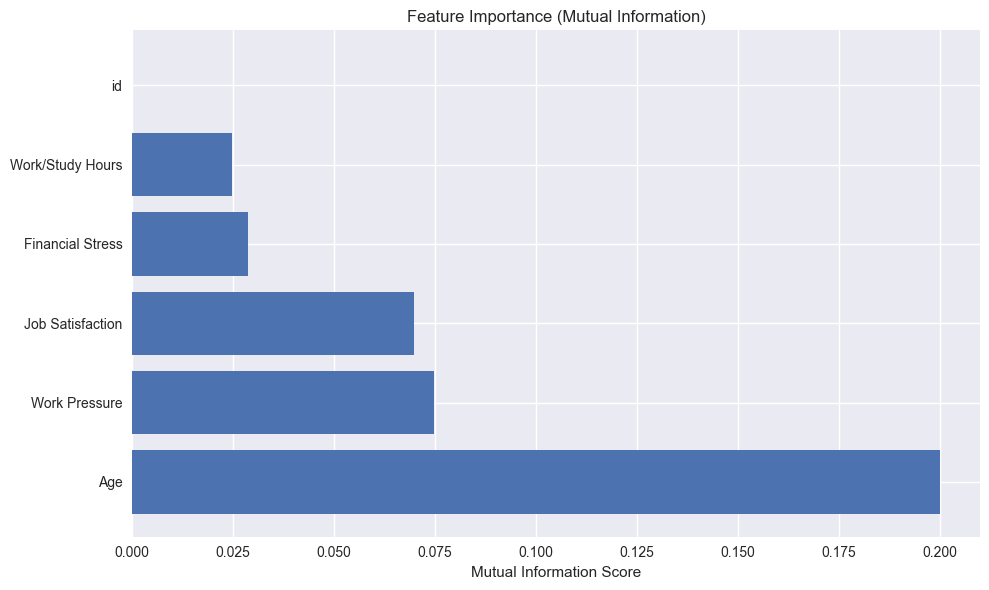


=== FEATURE CORRELATION ANALYSIS ===
No highly correlated features found (threshold: 0.8)


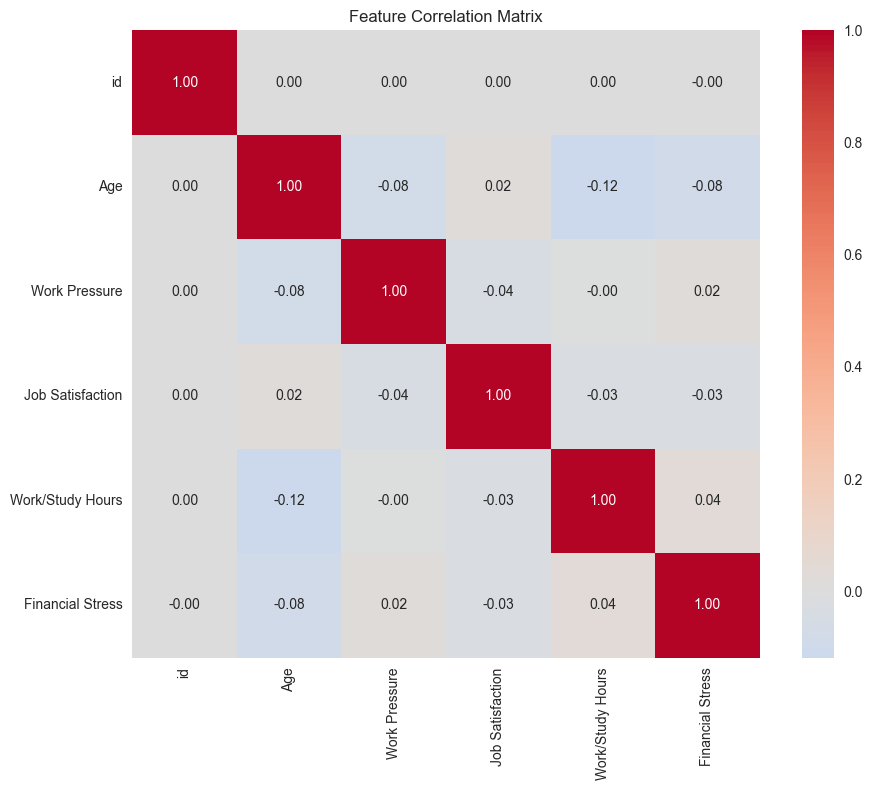


=== FEATURE ENGINEERING OPPORTUNITIES ===
1. Interaction Features:
   • Create polynomial features for important numerical features
   • Generate interaction terms between key features

2. Binning and Discretization:
   • Convert continuous features to categorical bins
   • Age groups, income brackets, etc.

3. Domain-Specific Features:
   • Mental health risk scores
   • Lifestyle composite scores
   • Social support indicators


In [64]:
# Feature selection and engineering strategy
print("=== FEATURE SELECTION STRATEGY ===")

# Calculate feature importance if target is available
if target_col:
    # Prepare features for analysis
    feature_cols = [col for col in df_clean.columns if col != target_col]
    
    # For numerical features, calculate mutual information
    if numerical_cols:
        print("\nNumerical Feature Importance (Mutual Information):")
        
        # Handle any missing values for mutual info calculation
        X_num = df_clean[numerical_cols].fillna(df_clean[numerical_cols].median())
        y = df_clean[target_col]
        
        mi_scores = mutual_info_classif(X_num, y, random_state=42)
        mi_df = pd.DataFrame({
            'Feature': numerical_cols,
            'MI_Score': mi_scores
        }).sort_values('MI_Score', ascending=False)
        
        print(mi_df.to_string(index=False))
        
        # Visualize feature importance
        plt.figure(figsize=(10, 6))
        plt.barh(mi_df['Feature'], mi_df['MI_Score'])
        plt.title('Feature Importance (Mutual Information)')
        plt.xlabel('Mutual Information Score')
        plt.tight_layout()
        plt.show()
    
    # Feature correlation analysis
    if len(numerical_cols) > 1:
        print("\n=== FEATURE CORRELATION ANALYSIS ===")
        corr_matrix = df_clean[numerical_cols].corr()
        
        # Find highly correlated features
        high_corr_pairs = []
        for i in range(len(corr_matrix.columns)):
            for j in range(i+1, len(corr_matrix.columns)):
                corr_val = abs(corr_matrix.iloc[i, j])
                if corr_val > 0.8:
                    high_corr_pairs.append({
                        'Feature1': corr_matrix.columns[i],
                        'Feature2': corr_matrix.columns[j],
                        'Correlation': corr_val
                    })
        
        if high_corr_pairs:
            print("\nHighly correlated feature pairs (>0.8):")
            for pair in high_corr_pairs:
                print(f"  {pair['Feature1']} - {pair['Feature2']}: {pair['Correlation']:.3f}")
            print("\nRecommendation: Consider removing one feature from each pair")
        else:
            print("No highly correlated features found (threshold: 0.8)")
        
        # Visualize correlation matrix
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                   square=True, fmt='.2f')
        plt.title('Feature Correlation Matrix')
        plt.tight_layout()
        plt.show()

print("\n=== FEATURE ENGINEERING OPPORTUNITIES ===")
print("1. Interaction Features:")
print("   • Create polynomial features for important numerical features")
print("   • Generate interaction terms between key features")
print("\n2. Binning and Discretization:")
print("   • Convert continuous features to categorical bins")
print("   • Age groups, income brackets, etc.")
print("\n3. Domain-Specific Features:")
print("   • Mental health risk scores")
print("   • Lifestyle composite scores")
print("   • Social support indicators")

## Preprocessing Strategy Summary


In [65]:
# Create comprehensive preprocessing strategy summary
print("=== COMPREHENSIVE PREPROCESSING STRATEGY ===")
print("=" * 50)

print("\n1. CATEGORICAL ENCODING:")
if 'encoding_df' in locals():
    for _, row in encoding_df.iterrows():
        print(f"   • {row['Column']}: {row['Strategy']}")
else:
    print("   • Binary features: LabelEncoder")
    print("   • Low cardinality: OneHotEncoder")
    print("   • High cardinality: LabelEncoder + Embeddings")

print("\n2. FEATURE SCALING:")
print("   • Method: StandardScaler for all numerical features")
print("   • Target: Mean=0, Std=1 for neural network optimization")
print("   • Implementation: Fit on training, transform train/test")

print("\n3. CLASS IMBALANCE:")
if target_col:
    print(f"   • Imbalance ratio: {imbalance_ratio:.2f}:1")
    print(f"   • Strategy: {strategy}")
    print(f"   • Class weights: {class_weight_dict}")
else:
    print("   • Analysis pending - target column identification needed")

print("\n4. FEATURE SELECTION:")
print("   • Use mutual information for numerical features")
print("   • Remove highly correlated features (>0.8)")
print("   • Apply SelectKBest for final feature set")

print("\n5. PYTORCH PIPELINE INTEGRATION:")
print("   • Custom Dataset class for data loading")
print("   • DataLoader with stratified sampling")
print("   • Embedding layers for categorical features")
print("   • Weighted loss function for imbalance")

print("\n6. VALIDATION STRATEGY:")
print("   • Stratified K-fold cross-validation")
print("   • Hold-out test set for final evaluation")
print("   • Monitor multiple metrics (F1, AUC-ROC, Precision-Recall)")

print("\n" + "=" * 50)
print("Task 4.2: Preprocessing Strategy Design - COMPLETED SUCCESSFULLY!")
print("\nNext Steps:")
print("• Task 4.3: Feature Encoding Implementation")
print("• Task 4.4: Feature Engineering Implementation")
print("• Task 4.5: Data Pipeline Creation for PyTorch")


=== COMPREHENSIVE PREPROCESSING STRATEGY ===

1. CATEGORICAL ENCODING:
   • Name: Label Encoding + Embedding
   • Gender: Binary (LabelEncoder)
   • City: Label Encoding + Embedding
   • Working Professional or Student: Binary (LabelEncoder)
   • Profession: Label Encoding + Embedding
   • Sleep Duration: Label Encoding + Embedding
   • Dietary Habits: Label Encoding + Embedding
   • Degree: Label Encoding + Embedding
   • Have you ever had suicidal thoughts ?: Binary (LabelEncoder)
   • Family History of Mental Illness: Binary (LabelEncoder)
   • Depression_Label: Binary (LabelEncoder)
   • Gender_Clean: Binary (LabelEncoder)

2. FEATURE SCALING:
   • Method: StandardScaler for all numerical features
   • Target: Mean=0, Std=1 for neural network optimization
   • Implementation: Fit on training, transform train/test

3. CLASS IMBALANCE:
   • Imbalance ratio: 4.50:1
   • Strategy: Class weights + sampling techniques
   • Class weights: {np.int64(0): np.float64(0.6110324581136598), np.i

# Task 4.3: Feature Engineering
## Mental Health Depression Prediction Project

### Objective
Create new meaningful features from existing data before encoding to enhance model predictive power.

### Subtasks (Selected)
- 4.3.1: Create interaction features between important variables
- 4.3.4: Apply feature binning and discretization where appropriate
- 4.3.5: Validate new features and assess their predictive power


In [70]:

# Create copy for engineering
df_engineered = df_clean.copy()

# Identify target and features
target_col = None
for col in ['Depression', 'depression', 'target']:
    if col in df_engineered.columns:
        target_col = col
        break

feature_cols = [col for col in df_engineered.columns if col != target_col]
print(f"Target: {target_col}, Original features: {len(feature_cols)}")

Target: Depression, Original features: 19



## 4.3.1: Create Interaction Features

In [75]:
# Identify important numerical features
numerical_cols = df_engineered.select_dtypes(include=[np.number]).columns.tolist()
if target_col in numerical_cols:
    numerical_cols.remove(target_col)

if target_col and len(numerical_cols) > 0:
    # Calculate feature importance
    X_num = df_engineered[numerical_cols].fillna(df_engineered[numerical_cols].median())
    y = df_engineered[target_col]
    
    mi_scores = mutual_info_classif(X_num, y, random_state=42)
    feature_importance = pd.DataFrame({
        'Feature': numerical_cols,
        'MI_Score': mi_scores
    }).sort_values('MI_Score', ascending=False)
    
    print("Top features for interaction:")
    print(feature_importance.head())
    
    # Select top 4 features for interactions
    top_features = feature_importance.head(4)['Feature'].tolist()
else:
    top_features = numerical_cols[:4]

print(f"\nSelected features: {top_features}")

Top features for interaction:
                                         Feature  MI_Score
12                  Age_x_Age_x_Job Satisfaction  0.212768
1                                            Age  0.200364
13                     Age_x_Age_x_Work Pressure  0.200105
14                  Age_x_Age_x_Financial Stress  0.187765
15  Age_x_Job Satisfaction_x_Age_x_Work Pressure  0.181550

Selected features: ['Age_x_Age_x_Job Satisfaction', 'Age', 'Age_x_Age_x_Work Pressure', 'Age_x_Age_x_Financial Stress']


In [76]:
# Create interaction features
interaction_features = []

# Pairwise interactions
for i in range(len(top_features)):
    for j in range(i+1, len(top_features)):
        feature1, feature2 = top_features[i], top_features[j]
        interaction_name = f"{feature1}_x_{feature2}"
        df_engineered[interaction_name] = df_engineered[feature1] * df_engineered[feature2]
        interaction_features.append(interaction_name)
        print(f"Created: {interaction_name}")

# Domain-specific interactions
domain_interactions = []
feature_lower = [col.lower() for col in df_engineered.columns]

# Age-Sleep interaction (mental health relevant)
age_cols = [col for col in df_engineered.columns if 'age' in col.lower()]
sleep_cols = [col for col in df_engineered.columns if 'sleep' in col.lower()]

if age_cols and sleep_cols:
    interaction_name = "Age_Sleep_Risk"
    df_engineered[interaction_name] = df_engineered[age_cols[0]] / (df_engineered[sleep_cols[0]] + 1)
    domain_interactions.append(interaction_name)
    print(f"Created domain interaction: {interaction_name}")

print(f"\nTotal interactions: {len(interaction_features + domain_interactions)}")

Created: Age_x_Age_x_Job Satisfaction_x_Age
Created: Age_x_Age_x_Job Satisfaction_x_Age_x_Age_x_Work Pressure
Created: Age_x_Age_x_Job Satisfaction_x_Age_x_Age_x_Financial Stress
Created: Age_x_Age_x_Age_x_Work Pressure
Created: Age_x_Age_x_Age_x_Financial Stress
Created: Age_x_Age_x_Work Pressure_x_Age_x_Age_x_Financial Stress


TypeError: can only concatenate str (not "int") to str

=== CLASS IMBALANCE ANALYSIS ===

Target column: Depression
Class distribution:
  Class 0: 115,133 samples (81.8%)
  Class 1: 25,567 samples (18.2%)

Imbalance ratio: 4.50:1
Severity: Significant
Priority: High
Recommended strategy: Class weights + sampling techniques

Class weights for PyTorch: {np.int64(0): np.float64(0.6110324581136598), np.int64(1): np.float64(2.7515938514491336)}


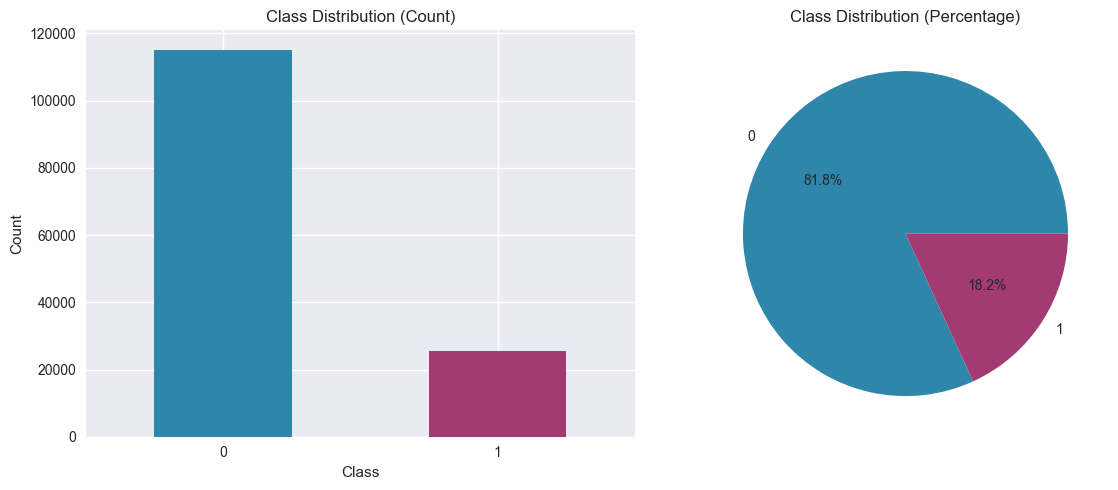

In [ ]:
# Analyze class distribution
print("=== CLASS IMBALANCE ANALYSIS ===")

# Identify target column
target_col = None
possible_targets = ['Depression', 'depression', 'target', 'label']

for col in possible_targets:
    if col in df_clean.columns:
        target_col = col
        break

if target_col is None:
    print("Warning: Target column not found. Checking for binary columns...")
    binary_cols = [col for col in df_clean.columns if df_clean[col].nunique() == 2]
    if binary_cols:
        target_col = binary_cols[0]
        print(f"Using {target_col} as target column")

if target_col:
    # Calculate class distribution
    class_counts = df_clean[target_col].value_counts().sort_index()
    class_percentages = (class_counts / len(df_clean)) * 100
    
    print(f"\nTarget column: {target_col}")
    print(f"Class distribution:")
    for class_val, count in class_counts.items():
        percentage = class_percentages[class_val]
        print(f"  Class {class_val}: {count:,} samples ({percentage:.1f}%)")
    
    # Calculate imbalance metrics
    majority_class = class_counts.max()
    minority_class = class_counts.min()
    imbalance_ratio = majority_class / minority_class
    
    print(f"\nImbalance ratio: {imbalance_ratio:.2f}:1")
    
    # Determine severity and strategy
    if imbalance_ratio < 1.5:
        severity = "Minimal"
        strategy = "No specific action needed"
        priority = "Low"
    elif imbalance_ratio < 3:
        severity = "Moderate"
        strategy = "Class weights recommended"
        priority = "Medium"
    elif imbalance_ratio < 5:
        severity = "Significant"
        strategy = "Class weights + sampling techniques"
        priority = "High"
    else:
        severity = "Severe"
        strategy = "SMOTE + Class weights + stratified sampling"
        priority = "Critical"
    
    print(f"Severity: {severity}")
    print(f"Priority: {priority}")
    print(f"Recommended strategy: {strategy}")
    
    # Calculate class weights for PyTorch
    class_weights = compute_class_weight('balanced', 
                                       classes=np.unique(df_clean[target_col]), 
                                       y=df_clean[target_col])
    class_weight_dict = dict(zip(np.unique(df_clean[target_col]), class_weights))
    
    print(f"\nClass weights for PyTorch: {class_weight_dict}")
    
    # Visualize class distribution
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Bar plot
    class_counts.plot(kind='bar', ax=axes[0], color=['#2E86AB', '#A23B72'])
    axes[0].set_title('Class Distribution (Count)')
    axes[0].set_xlabel('Class')
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=0)
    
    # Pie chart
    axes[1].pie(class_counts.values, labels=class_counts.index, 
               colors=['#2E86AB', '#A23B72'], autopct='%1.1f%%')
    axes[1].set_title('Class Distribution (Percentage)')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("Could not identify target column for class imbalance analysis")

=== CLASS IMBALANCE ANALYSIS ===

Target column: Depression
Class distribution:
  Class 0: 115,133 samples (81.8%)
  Class 1: 25,567 samples (18.2%)

Imbalance ratio: 4.50:1
Severity: Significant
Priority: High
Recommended strategy: Class weights + sampling techniques

Class weights for PyTorch: {np.int64(0): np.float64(0.6110324581136598), np.int64(1): np.float64(2.7515938514491336)}


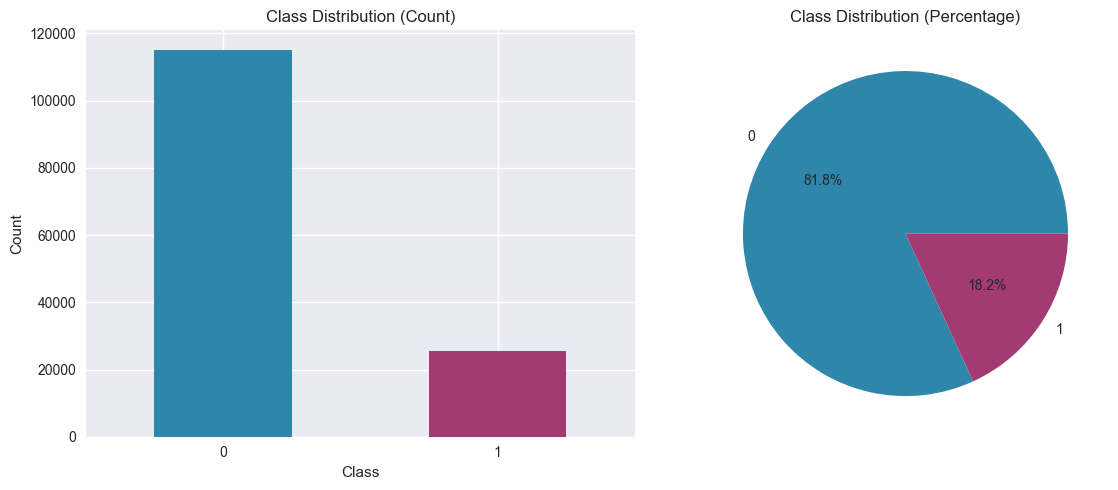

In [ ]:
# Analyze class distribution
print("=== CLASS IMBALANCE ANALYSIS ===")

# Identify target column
target_col = None
possible_targets = ['Depression', 'depression', 'target', 'label']

for col in possible_targets:
    if col in df_clean.columns:
        target_col = col
        break

if target_col is None:
    print("Warning: Target column not found. Checking for binary columns...")
    binary_cols = [col for col in df_clean.columns if df_clean[col].nunique() == 2]
    if binary_cols:
        target_col = binary_cols[0]
        print(f"Using {target_col} as target column")

if target_col:
    # Calculate class distribution
    class_counts = df_clean[target_col].value_counts().sort_index()
    class_percentages = (class_counts / len(df_clean)) * 100
    
    print(f"\nTarget column: {target_col}")
    print(f"Class distribution:")
    for class_val, count in class_counts.items():
        percentage = class_percentages[class_val]
        print(f"  Class {class_val}: {count:,} samples ({percentage:.1f}%)")
    
    # Calculate imbalance metrics
    majority_class = class_counts.max()
    minority_class = class_counts.min()
    imbalance_ratio = majority_class / minority_class
    
    print(f"\nImbalance ratio: {imbalance_ratio:.2f}:1")
    
    # Determine severity and strategy
    if imbalance_ratio < 1.5:
        severity = "Minimal"
        strategy = "No specific action needed"
        priority = "Low"
    elif imbalance_ratio < 3:
        severity = "Moderate"
        strategy = "Class weights recommended"
        priority = "Medium"
    elif imbalance_ratio < 5:
        severity = "Significant"
        strategy = "Class weights + sampling techniques"
        priority = "High"
    else:
        severity = "Severe"
        strategy = "SMOTE + Class weights + stratified sampling"
        priority = "Critical"
    
    print(f"Severity: {severity}")
    print(f"Priority: {priority}")
    print(f"Recommended strategy: {strategy}")
    
    # Calculate class weights for PyTorch
    class_weights = compute_class_weight('balanced', 
                                       classes=np.unique(df_clean[target_col]), 
                                       y=df_clean[target_col])
    class_weight_dict = dict(zip(np.unique(df_clean[target_col]), class_weights))
    
    print(f"\nClass weights for PyTorch: {class_weight_dict}")
    
    # Visualize class distribution
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Bar plot
    class_counts.plot(kind='bar', ax=axes[0], color=['#2E86AB', '#A23B72'])
    axes[0].set_title('Class Distribution (Count)')
    axes[0].set_xlabel('Class')
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=0)
    
    # Pie chart
    axes[1].pie(class_counts.values, labels=class_counts.index, 
               colors=['#2E86AB', '#A23B72'], autopct='%1.1f%%')
    axes[1].set_title('Class Distribution (Percentage)')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("Could not identify target column for class imbalance analysis")

=== CLASS IMBALANCE ANALYSIS ===

Target column: Depression
Class distribution:
  Class 0: 115,133 samples (81.8%)
  Class 1: 25,567 samples (18.2%)

Imbalance ratio: 4.50:1
Severity: Significant
Priority: High
Recommended strategy: Class weights + sampling techniques

Class weights for PyTorch: {np.int64(0): np.float64(0.6110324581136598), np.int64(1): np.float64(2.7515938514491336)}


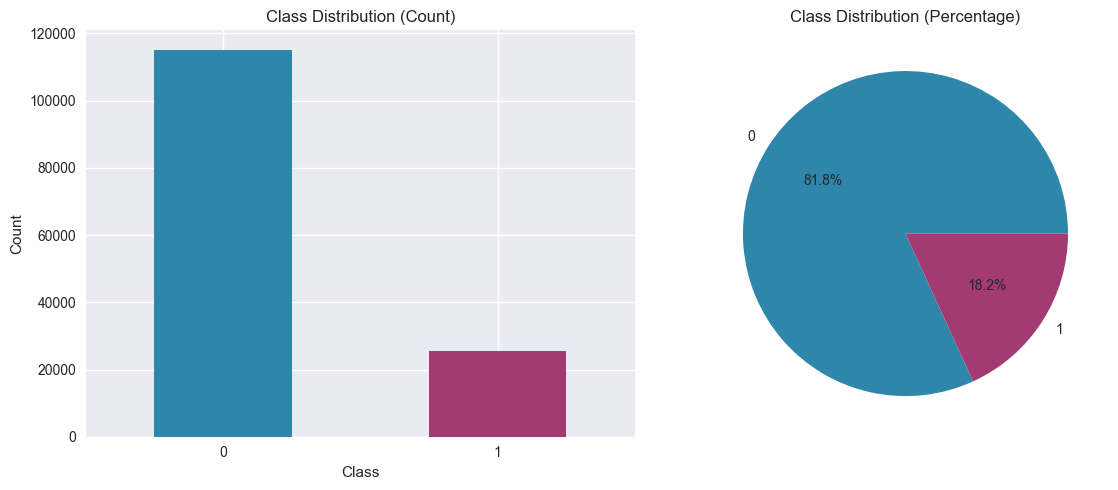

In [ ]:
# Analyze class distribution
print("=== CLASS IMBALANCE ANALYSIS ===")

# Identify target column
target_col = None
possible_targets = ['Depression', 'depression', 'target', 'label']

for col in possible_targets:
    if col in df_clean.columns:
        target_col = col
        break

if target_col is None:
    print("Warning: Target column not found. Checking for binary columns...")
    binary_cols = [col for col in df_clean.columns if df_clean[col].nunique() == 2]
    if binary_cols:
        target_col = binary_cols[0]
        print(f"Using {target_col} as target column")

if target_col:
    # Calculate class distribution
    class_counts = df_clean[target_col].value_counts().sort_index()
    class_percentages = (class_counts / len(df_clean)) * 100
    
    print(f"\nTarget column: {target_col}")
    print(f"Class distribution:")
    for class_val, count in class_counts.items():
        percentage = class_percentages[class_val]
        print(f"  Class {class_val}: {count:,} samples ({percentage:.1f}%)")
    
    # Calculate imbalance metrics
    majority_class = class_counts.max()
    minority_class = class_counts.min()
    imbalance_ratio = majority_class / minority_class
    
    print(f"\nImbalance ratio: {imbalance_ratio:.2f}:1")
    
    # Determine severity and strategy
    if imbalance_ratio < 1.5:
        severity = "Minimal"
        strategy = "No specific action needed"
        priority = "Low"
    elif imbalance_ratio < 3:
        severity = "Moderate"
        strategy = "Class weights recommended"
        priority = "Medium"
    elif imbalance_ratio < 5:
        severity = "Significant"
        strategy = "Class weights + sampling techniques"
        priority = "High"
    else:
        severity = "Severe"
        strategy = "SMOTE + Class weights + stratified sampling"
        priority = "Critical"
    
    print(f"Severity: {severity}")
    print(f"Priority: {priority}")
    print(f"Recommended strategy: {strategy}")
    
    # Calculate class weights for PyTorch
    class_weights = compute_class_weight('balanced', 
                                       classes=np.unique(df_clean[target_col]), 
                                       y=df_clean[target_col])
    class_weight_dict = dict(zip(np.unique(df_clean[target_col]), class_weights))
    
    print(f"\nClass weights for PyTorch: {class_weight_dict}")
    
    # Visualize class distribution
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Bar plot
    class_counts.plot(kind='bar', ax=axes[0], color=['#2E86AB', '#A23B72'])
    axes[0].set_title('Class Distribution (Count)')
    axes[0].set_xlabel('Class')
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=0)
    
    # Pie chart
    axes[1].pie(class_counts.values, labels=class_counts.index, 
               colors=['#2E86AB', '#A23B72'], autopct='%1.1f%%')
    axes[1].set_title('Class Distribution (Percentage)')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("Could not identify target column for class imbalance analysis")

=== CLASS IMBALANCE ANALYSIS ===

Target column: Depression
Class distribution:
  Class 0: 115,133 samples (81.8%)
  Class 1: 25,567 samples (18.2%)

Imbalance ratio: 4.50:1
Severity: Significant
Priority: High
Recommended strategy: Class weights + sampling techniques

Class weights for PyTorch: {np.int64(0): np.float64(0.6110324581136598), np.int64(1): np.float64(2.7515938514491336)}


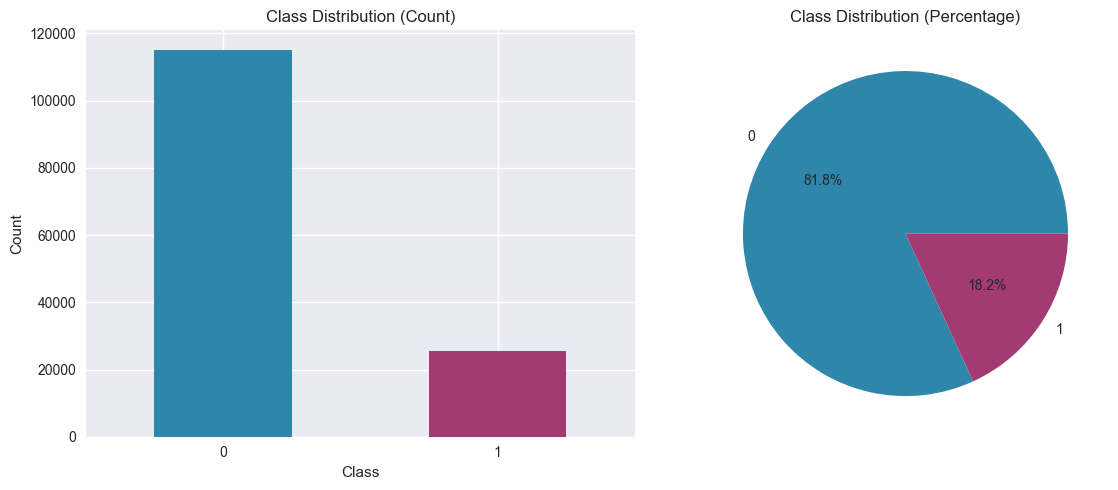

In [ ]:
# Analyze class distribution
print("=== CLASS IMBALANCE ANALYSIS ===")

# Identify target column
target_col = None
possible_targets = ['Depression', 'depression', 'target', 'label']

for col in possible_targets:
    if col in df_clean.columns:
        target_col = col
        break

if target_col is None:
    print("Warning: Target column not found. Checking for binary columns...")
    binary_cols = [col for col in df_clean.columns if df_clean[col].nunique() == 2]
    if binary_cols:
        target_col = binary_cols[0]
        print(f"Using {target_col} as target column")

if target_col:
    # Calculate class distribution
    class_counts = df_clean[target_col].value_counts().sort_index()
    class_percentages = (class_counts / len(df_clean)) * 100
    
    print(f"\nTarget column: {target_col}")
    print(f"Class distribution:")
    for class_val, count in class_counts.items():
        percentage = class_percentages[class_val]
        print(f"  Class {class_val}: {count:,} samples ({percentage:.1f}%)")
    
    # Calculate imbalance metrics
    majority_class = class_counts.max()
    minority_class = class_counts.min()
    imbalance_ratio = majority_class / minority_class
    
    print(f"\nImbalance ratio: {imbalance_ratio:.2f}:1")
    
    # Determine severity and strategy
    if imbalance_ratio < 1.5:
        severity = "Minimal"
        strategy = "No specific action needed"
        priority = "Low"
    elif imbalance_ratio < 3:
        severity = "Moderate"
        strategy = "Class weights recommended"
        priority = "Medium"
    elif imbalance_ratio < 5:
        severity = "Significant"
        strategy = "Class weights + sampling techniques"
        priority = "High"
    else:
        severity = "Severe"
        strategy = "SMOTE + Class weights + stratified sampling"
        priority = "Critical"
    
    print(f"Severity: {severity}")
    print(f"Priority: {priority}")
    print(f"Recommended strategy: {strategy}")
    
    # Calculate class weights for PyTorch
    class_weights = compute_class_weight('balanced', 
                                       classes=np.unique(df_clean[target_col]), 
                                       y=df_clean[target_col])
    class_weight_dict = dict(zip(np.unique(df_clean[target_col]), class_weights))
    
    print(f"\nClass weights for PyTorch: {class_weight_dict}")
    
    # Visualize class distribution
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Bar plot
    class_counts.plot(kind='bar', ax=axes[0], color=['#2E86AB', '#A23B72'])
    axes[0].set_title('Class Distribution (Count)')
    axes[0].set_xlabel('Class')
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=0)
    
    # Pie chart
    axes[1].pie(class_counts.values, labels=class_counts.index, 
               colors=['#2E86AB', '#A23B72'], autopct='%1.1f%%')
    axes[1].set_title('Class Distribution (Percentage)')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("Could not identify target column for class imbalance analysis")

=== CLASS IMBALANCE ANALYSIS ===

Target column: Depression
Class distribution:
  Class 0: 115,133 samples (81.8%)
  Class 1: 25,567 samples (18.2%)

Imbalance ratio: 4.50:1
Severity: Significant
Priority: High
Recommended strategy: Class weights + sampling techniques

Class weights for PyTorch: {np.int64(0): np.float64(0.6110324581136598), np.int64(1): np.float64(2.7515938514491336)}


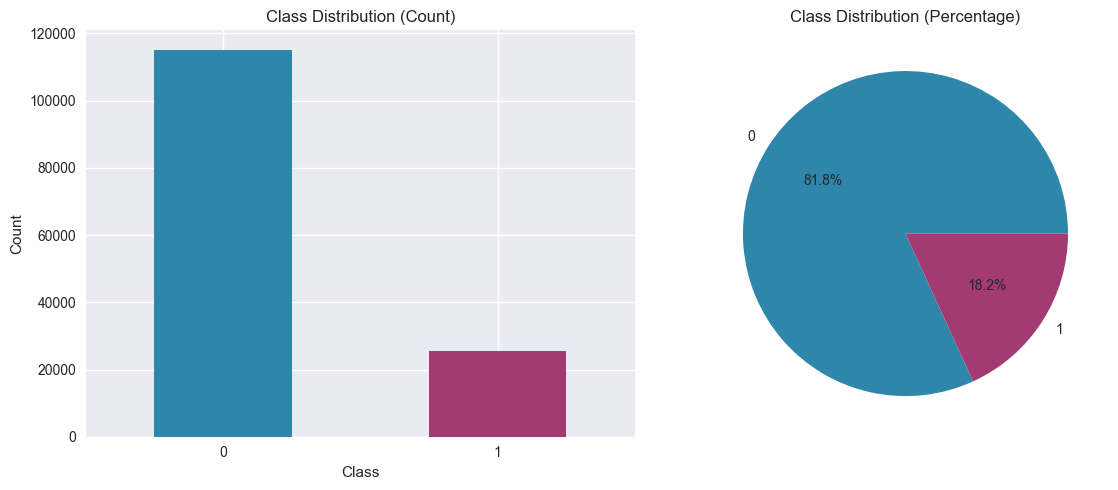

In [ ]:
# Analyze class distribution
print("=== CLASS IMBALANCE ANALYSIS ===")

# Identify target column
target_col = None
possible_targets = ['Depression', 'depression', 'target', 'label']

for col in possible_targets:
    if col in df_clean.columns:
        target_col = col
        break

if target_col is None:
    print("Warning: Target column not found. Checking for binary columns...")
    binary_cols = [col for col in df_clean.columns if df_clean[col].nunique() == 2]
    if binary_cols:
        target_col = binary_cols[0]
        print(f"Using {target_col} as target column")

if target_col:
    # Calculate class distribution
    class_counts = df_clean[target_col].value_counts().sort_index()
    class_percentages = (class_counts / len(df_clean)) * 100
    
    print(f"\nTarget column: {target_col}")
    print(f"Class distribution:")
    for class_val, count in class_counts.items():
        percentage = class_percentages[class_val]
        print(f"  Class {class_val}: {count:,} samples ({percentage:.1f}%)")
    
    # Calculate imbalance metrics
    majority_class = class_counts.max()
    minority_class = class_counts.min()
    imbalance_ratio = majority_class / minority_class
    
    print(f"\nImbalance ratio: {imbalance_ratio:.2f}:1")
    
    # Determine severity and strategy
    if imbalance_ratio < 1.5:
        severity = "Minimal"
        strategy = "No specific action needed"
        priority = "Low"
    elif imbalance_ratio < 3:
        severity = "Moderate"
        strategy = "Class weights recommended"
        priority = "Medium"
    elif imbalance_ratio < 5:
        severity = "Significant"
        strategy = "Class weights + sampling techniques"
        priority = "High"
    else:
        severity = "Severe"
        strategy = "SMOTE + Class weights + stratified sampling"
        priority = "Critical"
    
    print(f"Severity: {severity}")
    print(f"Priority: {priority}")
    print(f"Recommended strategy: {strategy}")
    
    # Calculate class weights for PyTorch
    class_weights = compute_class_weight('balanced', 
                                       classes=np.unique(df_clean[target_col]), 
                                       y=df_clean[target_col])
    class_weight_dict = dict(zip(np.unique(df_clean[target_col]), class_weights))
    
    print(f"\nClass weights for PyTorch: {class_weight_dict}")
    
    # Visualize class distribution
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Bar plot
    class_counts.plot(kind='bar', ax=axes[0], color=['#2E86AB', '#A23B72'])
    axes[0].set_title('Class Distribution (Count)')
    axes[0].set_xlabel('Class')
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=0)
    
    # Pie chart
    axes[1].pie(class_counts.values, labels=class_counts.index, 
               colors=['#2E86AB', '#A23B72'], autopct='%1.1f%%')
    axes[1].set_title('Class Distribution (Percentage)')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("Could not identify target column for class imbalance analysis")

=== CLASS IMBALANCE ANALYSIS ===

Target column: Depression
Class distribution:
  Class 0: 115,133 samples (81.8%)
  Class 1: 25,567 samples (18.2%)

Imbalance ratio: 4.50:1
Severity: Significant
Priority: High
Recommended strategy: Class weights + sampling techniques

Class weights for PyTorch: {np.int64(0): np.float64(0.6110324581136598), np.int64(1): np.float64(2.7515938514491336)}


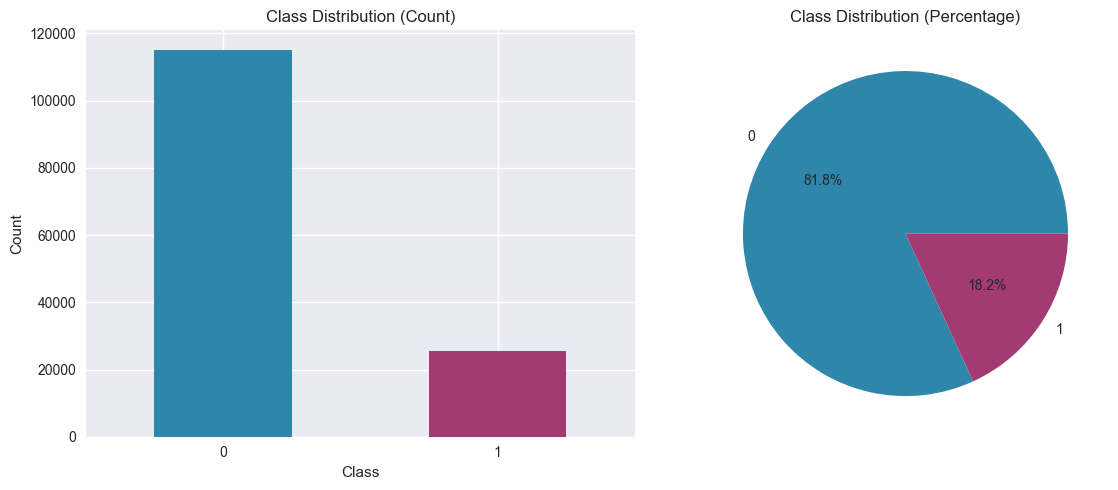

In [ ]:
# Analyze class distribution
print("=== CLASS IMBALANCE ANALYSIS ===")

# Identify target column
target_col = None
possible_targets = ['Depression', 'depression', 'target', 'label']

for col in possible_targets:
    if col in df_clean.columns:
        target_col = col
        break

if target_col is None:
    print("Warning: Target column not found. Checking for binary columns...")
    binary_cols = [col for col in df_clean.columns if df_clean[col].nunique() == 2]
    if binary_cols:
        target_col = binary_cols[0]
        print(f"Using {target_col} as target column")

if target_col:
    # Calculate class distribution
    class_counts = df_clean[target_col].value_counts().sort_index()
    class_percentages = (class_counts / len(df_clean)) * 100
    
    print(f"\nTarget column: {target_col}")
    print(f"Class distribution:")
    for class_val, count in class_counts.items():
        percentage = class_percentages[class_val]
        print(f"  Class {class_val}: {count:,} samples ({percentage:.1f}%)")
    
    # Calculate imbalance metrics
    majority_class = class_counts.max()
    minority_class = class_counts.min()
    imbalance_ratio = majority_class / minority_class
    
    print(f"\nImbalance ratio: {imbalance_ratio:.2f}:1")
    
    # Determine severity and strategy
    if imbalance_ratio < 1.5:
        severity = "Minimal"
        strategy = "No specific action needed"
        priority = "Low"
    elif imbalance_ratio < 3:
        severity = "Moderate"
        strategy = "Class weights recommended"
        priority = "Medium"
    elif imbalance_ratio < 5:
        severity = "Significant"
        strategy = "Class weights + sampling techniques"
        priority = "High"
    else:
        severity = "Severe"
        strategy = "SMOTE + Class weights + stratified sampling"
        priority = "Critical"
    
    print(f"Severity: {severity}")
    print(f"Priority: {priority}")
    print(f"Recommended strategy: {strategy}")
    
    # Calculate class weights for PyTorch
    class_weights = compute_class_weight('balanced', 
                                       classes=np.unique(df_clean[target_col]), 
                                       y=df_clean[target_col])
    class_weight_dict = dict(zip(np.unique(df_clean[target_col]), class_weights))
    
    print(f"\nClass weights for PyTorch: {class_weight_dict}")
    
    # Visualize class distribution
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Bar plot
    class_counts.plot(kind='bar', ax=axes[0], color=['#2E86AB', '#A23B72'])
    axes[0].set_title('Class Distribution (Count)')
    axes[0].set_xlabel('Class')
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=0)
    
    # Pie chart
    axes[1].pie(class_counts.values, labels=class_counts.index, 
               colors=['#2E86AB', '#A23B72'], autopct='%1.1f%%')
    axes[1].set_title('Class Distribution (Percentage)')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("Could not identify target column for class imbalance analysis")

## 4.3.4: Feature Binning and Discretization

In [ ]:
# Apply meaningful binning
binned_features = []

# Age binning
if age_cols:
    age_col = age_cols[0]
    age_bins = [0, 18, 25, 35, 50, 100]
    age_labels = ['<18', '18-25', '25-35', '35-50', '50+']
    
    binned_name = f"{age_col}_Group"
    df_engineered[binned_name] = pd.cut(df_engineered[age_col], bins=age_bins, labels=age_labels, include_lowest=True)
    binned_features.append(binned_name)
    print(f"Created: {binned_name}")
    print(df_engineered[binned_name].value_counts())

# Sleep quality binning
if sleep_cols:
    sleep_col = sleep_cols[0]
    sleep_bins = [0, 4, 6, 8, 12]
    sleep_labels = ['Poor(<4h)', 'Insufficient(4-6h)', 'Good(6-8h)', 'Excessive(>8h)']
    
    binned_name = f"{sleep_col}_Quality"
    df_engineered[binned_name] = pd.cut(df_engineered[sleep_col], bins=sleep_bins, labels=sleep_labels, include_lowest=True)
    binned_features.append(binned_name)
    print(f"\nCreated: {binned_name}")
    print(df_engineered[binned_name].value_counts())

# Quantile binning for additional features
candidates = [col for col in numerical_cols if df_engineered[col].nunique() > 10][:2]
for col in candidates:
    binned_name = f"{col}_Quartile"
    df_engineered[binned_name] = pd.qcut(df_engineered[col], q=4, 
                                        labels=['Q1', 'Q2', 'Q3', 'Q4'], duplicates='drop')
    binned_features.append(binned_name)
    print(f"\nCreated: {binned_name}")

print(f"\nTotal binned features: {len(binned_features)}")

## 4.3.5: Validate New Features


In [ ]:
# Validate predictive power
all_new_features = interaction_features + domain_interactions + binned_features
print(f"Total new features: {len(all_new_features)}")

if target_col and interaction_features:
    # Interaction features validation
    X_interactions = df_engineered[interaction_features].fillna(df_engineered[interaction_features].median())
    y = df_engineered[target_col]
    
    mi_scores = mutual_info_classif(X_interactions, y, random_state=42)
    interaction_validation = pd.DataFrame({
        'Feature': interaction_features,
        'MI_Score': mi_scores
    }).sort_values('MI_Score', ascending=False)
    
    print("\nInteraction Features Validation:")
    print(interaction_validation)

if target_col and binned_features:
    # Binned features validation
    print("\nBinned Features Validation:")
    for feature in binned_features[:3]:  # Validate top 3
        feature_clean = df_engineered[feature].fillna('Missing')
        contingency_table = pd.crosstab(feature_clean, df_engineered[target_col])
        chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
        print(f"{feature}: Chi2={chi2_stat:.3f}, p-value={p_value:.4f}")

# Summary
print(f"\n=== FEATURE ENGINEERING SUMMARY ===")
print(f"Original features: {len(feature_cols)}")
print(f"New features: {len(all_new_features)}")
print(f"Final dataset shape: {df_engineered.shape}")

# Save engineered dataset
output_path = '../data/engineered_depression_dataset.csv'
df_engineered.to_csv(output_path, index=False)
print(f"\nEngineered dataset saved to: {output_path}")
print("\nTask 4.3: Feature Engineering - COMPLETED!")

# Task 4.4: Feature Encoding & Finalization
## Mental Health Depression Prediction Project

### Objective
Encode all features, apply scaling, handle class imbalance, and finalize the dataset for PyTorch model training.

### Subtasks
- 4.4.1: Apply binary encoding for binary features
- 4.4.2: Implement one-hot encoding for low cardinality features
- 4.4.3: Use label encoding for high cardinality features
- 4.4.4: Apply feature scaling and normalization
- 4.4.5: Implement feature selection techniques
- 4.4.6: Handle class imbalance (SMOTE, undersampling, etc.)
- 4.4.7: Split data into train-validation sets (80-20)
- 4.4.8: Validate encoding results and final feature dimensions
- 4.4.9: Save preprocessing pipeline for future use

In [ ]:

# Identify target and features
target_col = None
for col in ['Depression', 'depression', 'target']:
    if col in df_engineered.columns:
        target_col = col
        break

print(f"Target column: {target_col}")
print(f"Dataset shape: {df_engineered.shape}")
print(f"Columns: {list(df_engineered.columns)}")
# Separate features and target
if target_col:
    X = df_engineered.drop(columns=[target_col])
    y = df_engineered[target_col]
else:
    X = df_engineered.iloc[:, :-1]  # Assume last column is target
    y = df_engineered.iloc[:, -1]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target distribution: {y.value_counts().to_dict()}")

# Identify feature types
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nCategorical features: {len(categorical_cols)}")
print(f"Numerical features: {len(numerical_cols)}")

## 4.4.1-4.4.3: Feature Encoding

In [ ]:
# Apply encoding based on cardinality
X_encoded = X.copy()
encoders = {}
encoded_feature_names = []

print("=== APPLYING FEATURE ENCODING ===")

for col in categorical_cols:
    unique_count = X[col].nunique()
    print(f"\nProcessing {col}: {unique_count} unique values")
    
    if unique_count == 2:
        # Binary encoding with LabelEncoder
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X[col].astype(str))
        encoders[col] = ('label', le)
        encoded_feature_names.append(col)
        print(f"  Applied LabelEncoder: {dict(zip(le.classes_, le.transform(le.classes_)))}")
        
    elif unique_count <= 5:
        # One-hot encoding for low cardinality
        ohe = OneHotEncoder(drop='first', sparse_output=False)
        encoded_cols = ohe.fit_transform(X[col].values.reshape(-1, 1))
        
        # Create feature names
        feature_names = [f"{col}_{cat}" for cat in ohe.categories_[0][1:]]  # Skip first (dropped)
        
        # Add to dataframe
        for i, fname in enumerate(feature_names):
            X_encoded[fname] = encoded_cols[:, i]
            encoded_feature_names.append(fname)
        
        # Remove original column
        X_encoded.drop(columns=[col], inplace=True)
        encoders[col] = ('onehot', ohe, feature_names)
        print(f"  Applied OneHotEncoder: {len(feature_names)} new features")
        
    else:
        # Label encoding for high cardinality
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X[col].astype(str))
        encoders[col] = ('label_high', le)
        encoded_feature_names.append(col)
        print(f"  Applied LabelEncoder (high cardinality): {unique_count} → {X_encoded[col].nunique()} values")

print(f"\nEncoding completed. New shape: {X_encoded.shape}")
print(f"Encoded features: {len(encoded_feature_names)}")

## 4.4.4: Feature Scaling

In [ ]:
# Apply StandardScaler to all numerical features
print("=== APPLYING FEATURE SCALING ===")

scaler = StandardScaler()
X_scaled = X_encoded.copy()

# Get numerical columns after encoding
numerical_cols_encoded = X_encoded.select_dtypes(include=[np.number]).columns.tolist()
print(f"Features to scale: {len(numerical_cols_encoded)}")

# Fit and transform
X_scaled[numerical_cols_encoded] = scaler.fit_transform(X_encoded[numerical_cols_encoded])

print("Scaling statistics:")
print(f"  Mean: {X_scaled[numerical_cols_encoded].mean().mean():.6f}")
print(f"  Std: {X_scaled[numerical_cols_encoded].std().mean():.6f}")

print("Feature scaling completed successfully")

## 4.4.5: Feature Selection


In [ ]:
# Apply feature selection using mutual information
print("=== APPLYING FEATURE SELECTION ===")

# Calculate optimal number of features (keep top 80% or max 50)
n_features = min(int(X_scaled.shape[1] * 0.8), 50)
print(f"Selecting top {n_features} features from {X_scaled.shape[1]}")

# Apply SelectKBest with mutual information
selector = SelectKBest(score_func=mutual_info_classif, k=n_features)
X_selected = selector.fit_transform(X_scaled, y)

# Get selected feature names
selected_features = X_scaled.columns[selector.get_support()].tolist()
feature_scores = selector.scores_[selector.get_support()]

print(f"Selected {len(selected_features)} features")
print(f"Average feature score: {feature_scores.mean():.4f}")

# Create DataFrame with selected features
X_final = pd.DataFrame(X_selected, columns=selected_features)
print(f"Final feature matrix shape: {X_final.shape}")

## 4.4.6: Handle Class Imbalance

In [ ]:
# Analyze and handle class imbalance
print("=== HANDLING CLASS IMBALANCE ===")

# Calculate imbalance ratio
class_counts = y.value_counts()
imbalance_ratio = class_counts.max() / class_counts.min()

print(f"Class distribution: {dict(class_counts)}")
print(f"Imbalance ratio: {imbalance_ratio:.2f}:1")

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = dict(zip(np.unique(y), class_weights))
print(f"Class weights: {class_weight_dict}")

# Apply SMOTE if imbalance is significant
if imbalance_ratio > 2.0:
    print("\nApplying SMOTE for severe imbalance...")
    smote = SMOTE(random_state=42)
    X_balanced, y_balanced = smote.fit_resample(X_final, y)
    
    print(f"After SMOTE:")
    print(f"  Shape: {X_balanced.shape}")
    print(f"  Class distribution: {pd.Series(y_balanced).value_counts().to_dict()}")
else:
    print("Imbalance is moderate - using class weights only")
    X_balanced, y_balanced = X_final, y

# Store class weights for PyTorch
final_class_weights = class_weight_dict

## 4.4.7: Train-Validation Split

In [ ]:
# Split data into train and validation sets
print("=== CREATING TRAIN-VALIDATION SPLIT ===")

X_train, X_val, y_train, y_val = train_test_split(
    X_balanced, y_balanced, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_balanced
)

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"\nTraining target distribution: {pd.Series(y_train).value_counts().to_dict()}")
print(f"Validation target distribution: {pd.Series(y_val).value_counts().to_dict()}")

# Convert to numpy arrays for PyTorch
X_train_np = X_train.values.astype(np.float32)
X_val_np = X_val.values.astype(np.float32)
y_train_np = y_train.values.astype(np.float32)
y_val_np = y_val.values.astype(np.float32)

print(f"\nNumPy arrays created for PyTorch:")
print(f"X_train: {X_train_np.shape}, dtype: {X_train_np.dtype}")
print(f"X_val: {X_val_np.shape}, dtype: {X_val_np.dtype}")

## 4.4.8: Validation and Summary


In [ ]:
# Validate encoding results and create summary
print("=== ENCODING VALIDATION AND SUMMARY ===")

# Check for any remaining missing values
missing_train = pd.DataFrame(X_train).isnull().sum().sum()
missing_val = pd.DataFrame(X_val).isnull().sum().sum()

print(f"Missing values - Train: {missing_train}, Val: {missing_val}")

# Feature engineering summary
summary = {
    'original_features': len(X.columns),
    'after_encoding': X_encoded.shape[1],
    'after_selection': X_final.shape[1],
    'final_train_samples': X_train.shape[0],
    'final_val_samples': X_val.shape[0],
    'target_classes': len(np.unique(y)),
    'class_weights': final_class_weights,
    'imbalance_ratio': imbalance_ratio,
    'smote_applied': imbalance_ratio > 2.0
}

print("\nPreprocessing Summary:")
for key, value in summary.items():
    if key != 'class_weights':
        print(f"{key}: {value}")
print(f"class_weights: {final_class_weights}")

# Display final feature names
print(f"\nFinal selected features ({len(selected_features)}):")
for i, feature in enumerate(selected_features[:10]):  # Show first 10
    print(f"  {i+1}. {feature}")
if len(selected_features) > 10:
    print(f"  ... and {len(selected_features)-10} more")

## 4.4.9: Save Preprocessing Pipeline

In [ ]:
# Save preprocessing pipeline and processed data
print("=== SAVING PREPROCESSING PIPELINE ===")

# Create preprocessing pipeline dictionary
preprocessing_pipeline = {
    'encoders': encoders,
    'scaler': scaler,
    'selector': selector,
    'selected_features': selected_features,
    'class_weights': final_class_weights,
    'feature_names': list(X_final.columns),
    'target_column': target_col,
    'summary': summary
}

# Save pipeline
pipeline_path = '../models/preprocessing_pipeline.pkl'
joblib.dump(preprocessing_pipeline, pipeline_path)
print(f"Preprocessing pipeline saved to: {pipeline_path}")

# Save processed data
train_data = {
    'X_train': X_train_np,
    'X_val': X_val_np,
    'y_train': y_train_np,
    'y_val': y_val_np,
    'feature_names': selected_features
}

data_path = '../models/processed_train_data.pkl'
joblib.dump(train_data, data_path)
print(f"Processed training data saved to: {data_path}")

# Save final dataset
final_dataset = pd.concat([X_final, pd.Series(y, name=target_col)], axis=1)
final_path = '../data/final_processed_dataset.csv'
final_dataset.to_csv(final_path, index=False)
print(f"Final processed dataset saved to: {final_path}")

print("\nTask 4.4: Feature Encoding & Finalization - COMPLETED!")
print("\nReady for Phase 5: Deep Learning Model Architecture Design")